# Economic Development and Fertility in China: Assessing the Impact of the Universal Two-Child Policy

## 1. Introduction

### 1.1 Background
Over the last two decades, China has experienced significant economic growth, which led to elevated civil income levels and improved living standards. However, it is worth noting that the rapid growth in economics is accompanied by a decline in the fertility rate, with varying degrees in different provinces. Similar to other major economies in the world, high housing and educational costs in China have deterred people from having children in recent years, especially in the metropolitan areas. In order to boost the growth in new births to prevent future shrinking workforce and rapid population ageing, in October 2015, the Chinese government enacted a universal Two-child policy, which was implemented nationwide in 2016. The new policy would allow almost all Chinese people to have their preferred number of children (Zeng & Hesketh, 2016). Does such policy offset people's downward willingness to raise babies? Why the birth rate is declining under rapid economic development in China?

Based on such a background of Chinese demographic issues, we want to investigate the link between economic development (quantified by Nominal GDP per capita, average wage, disposable income per capita, unemployment rate and inflation rate) and the birth rate in China under the universal Two-child policy using 2006-2019 provincial data.

### 1.2 Research Question
- What is the link between economic development and the birth rate in China? 
- Does the Two-child Policy have significant effect on birth rate?

### 1.3 General Strategy

To answer these questions, I will first visualize the macroeconomic variables chosen for quantifying economic development to see the overall trend of each variable and investigate if there is any obvious correlation between the provinces under each variable. Then, I will fit a regression model on the birth rate using the economic factors and the indicator variable that denotes the Two-child Policy. To improve the accuracy of the estimates, standard errors will be clustered at the provincial level. Multicollinearity among predictors will be evaluated using the variance inflation factor (VIF), and only relevant variables will be retained in the final model specification. The results of this refined model will serve as the basis for drawing conclusions about the relationship between economic development, policy intervention, and demographic change.

### 1.4 Dataset
The raw data was found on the official website of National Bureau of Statistics of China (NBSC). We selected the birth rate data and several macroeconomic variables to quantify economic development from 2006 to 2019 at a provincial level. We will analyze them one by one in the exploratory analysis section and build a new dataset for fitting the regression model later. 

Below is a summary of the data:

- **Birth rate**: The permillage of newborns in the total populations at the end of the year. 

- **Nominal GDP**: In 100 million yuan.

- **Population**: In 10 thousand. The amount of the permanent population of the province at the end of the year.

- **Average wage**: In yuan. The average wage of employees working in the state-owned business. 

- **Disposable income per capita**: In yuan.

- **Unemployment rate**: In percentage. The percentage of people in the digital workforce who are not working at a given time but are actively looking for work.

- **CPI**: The Consumer Price Index (CPI) represents changes in prices as experienced by Chinese consumers, which is calculated by dividing the value of a specific basket of goods today compared to one year ago.

In order to make the data comparable across provinces, we will calculate Nominal GDP per capita using the Nominal GDP and population.
- **Nominal GDP per capita**: In 10 thousand yuan.

We will derive the inflation rate using the CPI data.
- **Inflation Rate**: In percentage. The rate at which prices increase over time, resulting in a fall in the purchasing value of money.

## 2. Exploratory Data Analysis

In this section, we will visualize our datasets to show how the birth rate, Nominal GDP per capita, average wage, disposable income per capita, and unemployment rate change overtime and give horizontal comparison based on the visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

sys.path.append("scripts/")
from scripts import generate_eda as eda

%matplotlib inline

### 2.1 Data Analysis and visualizations of birth rate and economic factors

#### 2.1.1 Data Analysis of birth rate

In [2]:
birthrate = pd.read_csv("cleaned-data/1_birth rate.csv")
birthrate.head()

Region   2019   2018   2017   2016   2015   2014  \
0                           Beijing   8.12   8.24   9.06   9.32   7.96   9.75   
1                           Tianjin   6.73   6.67   7.65   7.37   5.84   8.19   
2                             Hebei  10.83  11.26  13.20  12.42  11.35  13.18   
3                            Shanxi   9.12   9.63  11.06  10.29   9.98  10.92   
4  Inner Mongolia Autonomous Region   8.23   8.35   9.47   9.03   7.72   9.31   

    2013   2012   2011   2010   2009   2008   2007   2006  
0   8.93   9.05   8.29   7.48   8.06   8.17   8.32   6.26  
1   8.28   8.75   8.58   8.18   8.30   8.13   7.91   7.67  
2  13.04  12.88  13.02  13.22  12.93  13.04  13.33  12.82  
3  10.81  10.70  10.47  10.68  10.87  11.32  11.30  11.48  
4   8.98   9.17   8.94   9.30   9.57   9.81  10.21   9.87

In [3]:
birthrate.describe()

2019       2018       2017       2016       2015       2014  \
count  31.000000  31.000000  31.000000  31.000000  31.000000  31.000000   
mean   10.560968  11.105161  12.120968  11.800968  11.150968  11.632581   
std     2.516930   2.649351   2.973572   2.947632   2.942027   2.616709   
min     5.730000   5.980000   6.220000   5.550000   5.840000   6.490000   
25%     8.675000   9.475000  10.385000  10.025000   9.515000   9.940000   
50%    10.700000  11.260000  12.950000  12.180000  11.350000  12.210000   
75%    12.610000  13.230000  14.025000  13.630000  13.100000  13.380000   
max    14.600000  15.220000  17.540000  17.890000  15.750000  16.440000   

            2013       2012       2011       2010       2009       2008  \
count  31.000000  31.000000  31.000000  31.000000  31.000000  31.000000   
mean   11.260323  11.422581  11.075484  11.290323  11.380000  11.420645   
std     2.678159   2.527621   2.643896   2.715654   2.666403   2.627924   
min     5.360000   5.730000   5.710000   6.680000   6.060000   6.320000   
25%     9.670000   9.725000   9.530000   9.235000   9.515000   9.440000   
50%    11.410000  11.870000  11.410000  11.270000  11.700000  11.420000   
75%    13.085000  13.265000  13.330000  13.470000  13.485000  13.355000   
max    15.840000  15.480000  15.390000  15.990000  15.990000  16.050000   

            2007       2006  
count  31.000000  31.000000  
mean   11.514516  11.402581  
std     2.657100   2.943015  
min     6.890000   6.260000  
25%     9.290000   9.250000  
50%    11.300000  11.600000  
75%    13.305000  13.500000  
max    16.790000  17.400000

In [4]:
birthrate_long = pd.melt(birthrate, id_vars="Region", var_name="Year",
                      value_name="birth_rate")
birthrate_long.sort_values(by="Year", inplace=True)

In [5]:
birthrate_long.head()

Region  Year  birth_rate
433  Xinjiang Uygur Autonomous Region  2006       15.79
403                           Beijing  2006        6.26
404                           Tianjin  2006        7.67
405                             Hebei  2006       12.82
406                            Shanxi  2006       11.48

#### Line chart of birth rate trend for each province

(4.7335, 24.0)

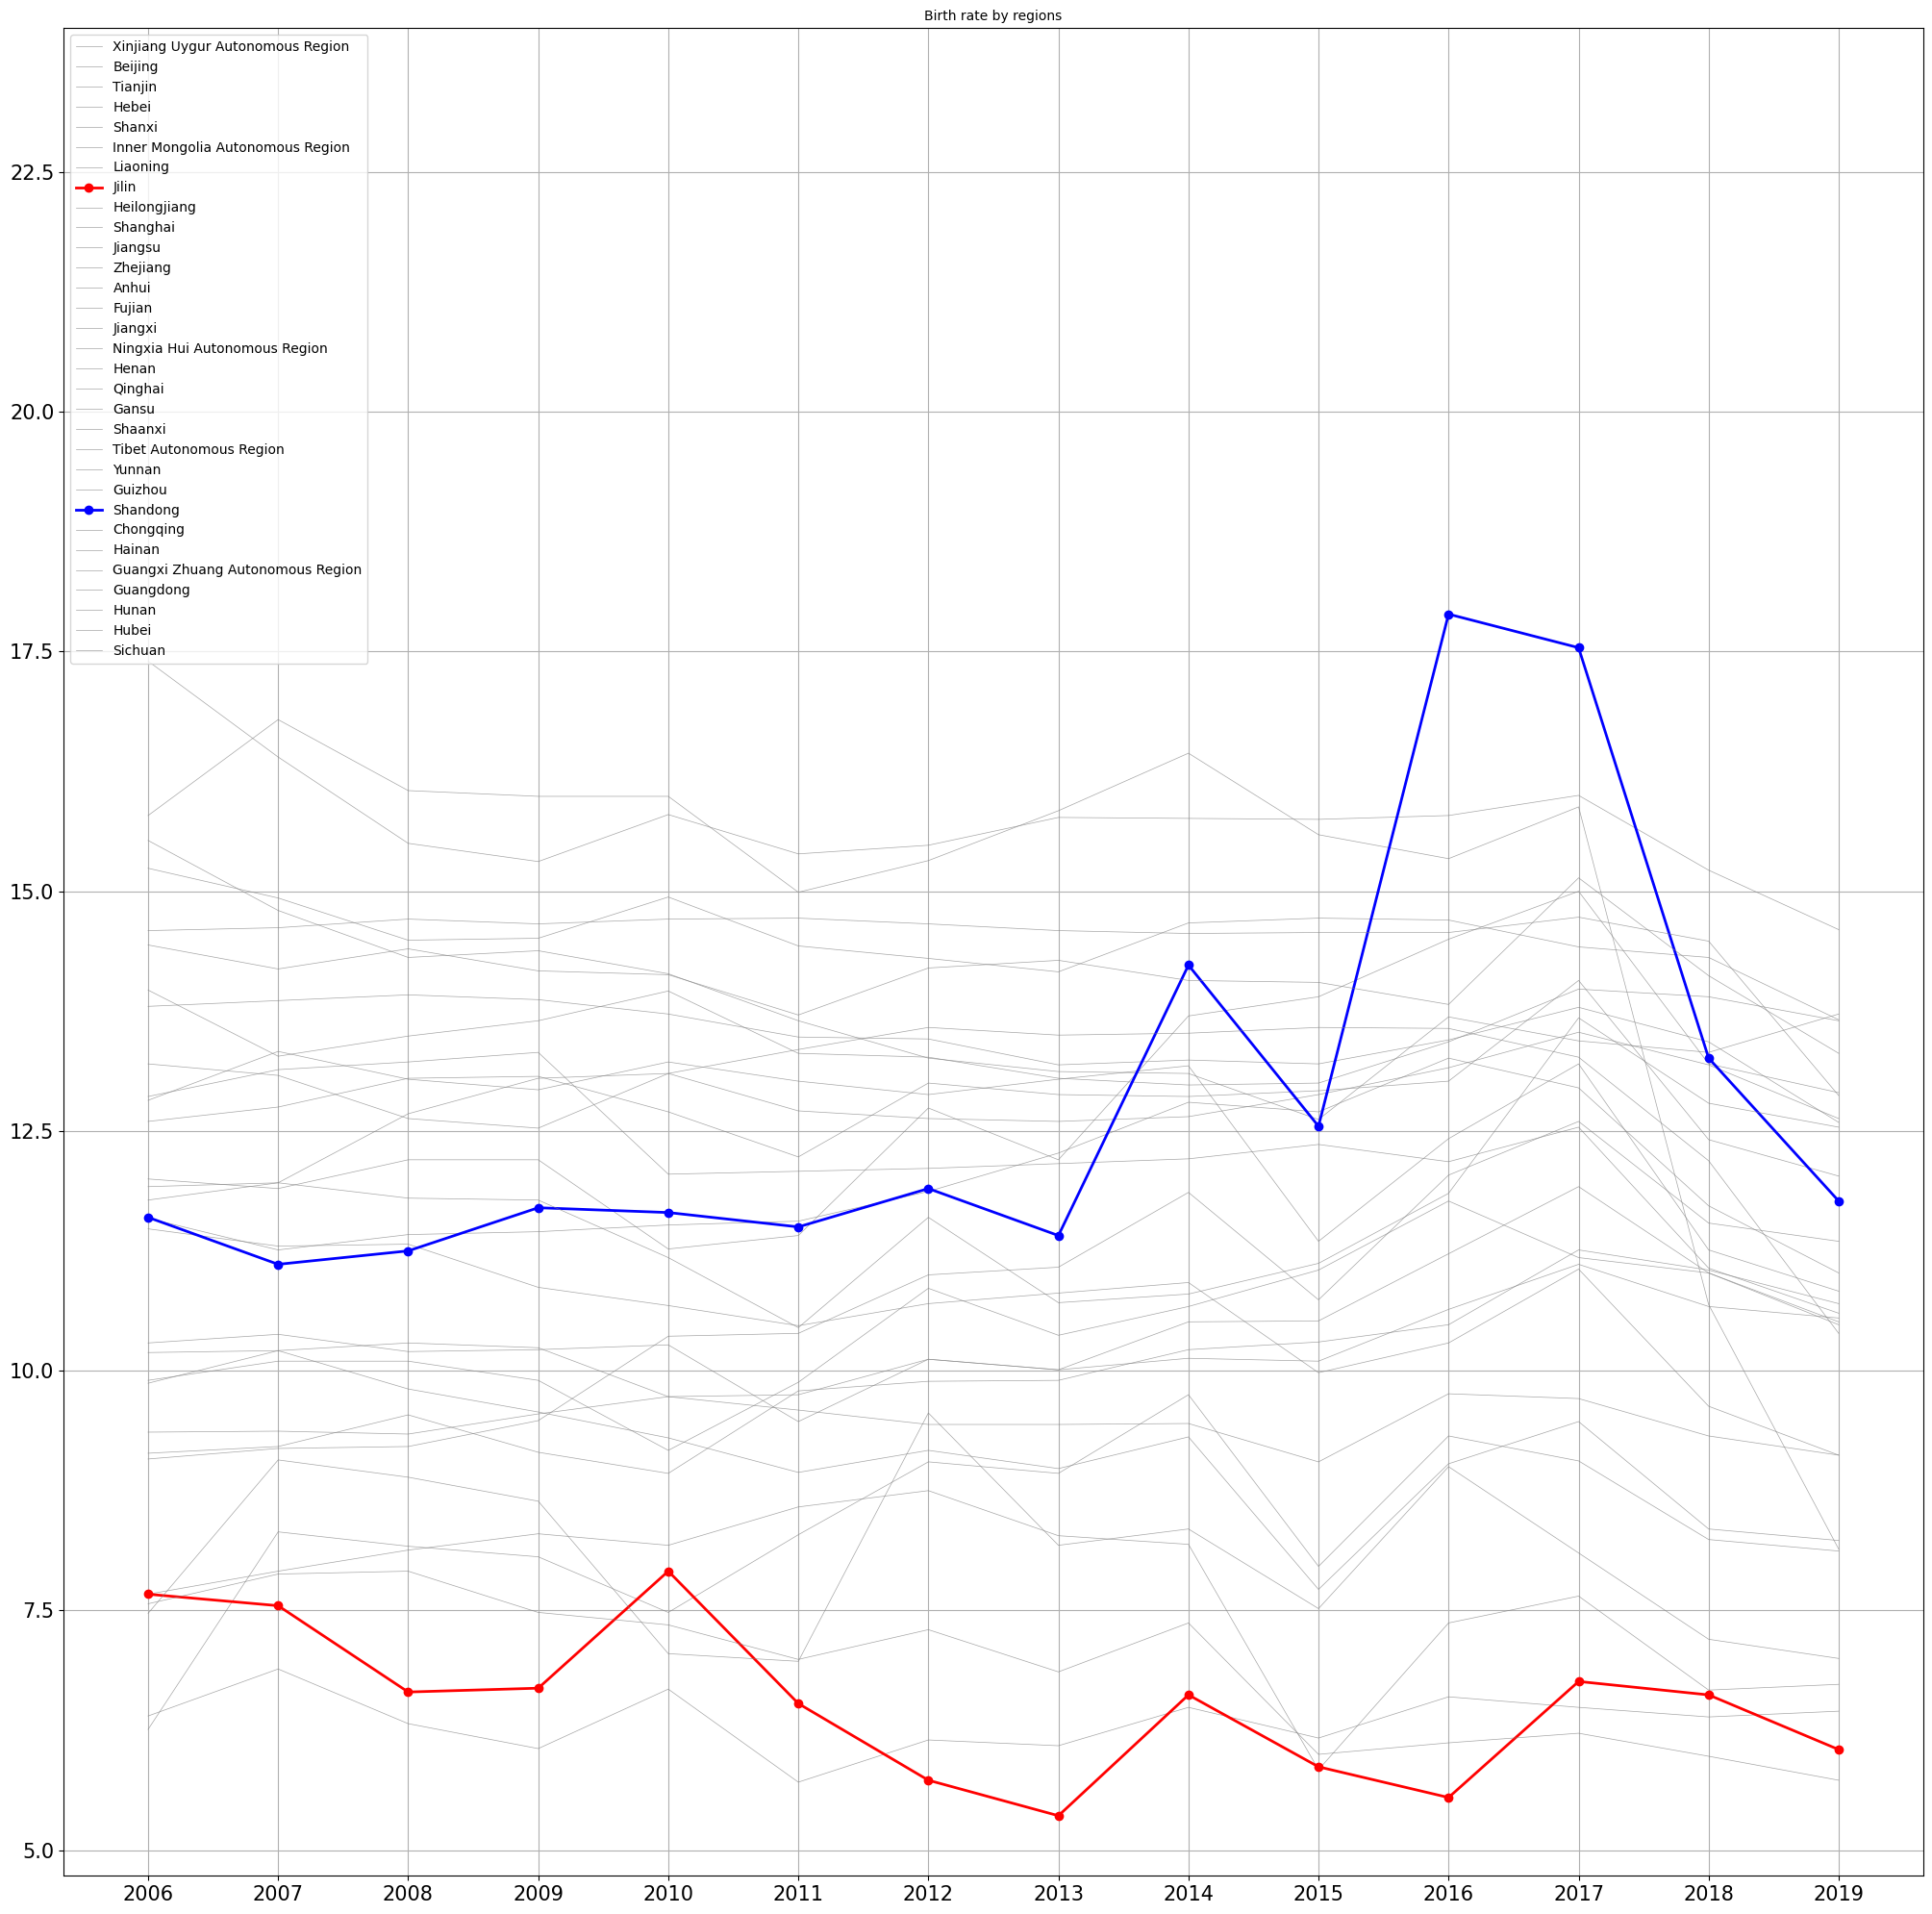

In [6]:
configs = {
    "FONT_SIZE": 10, 
    "FIGSIZE": (20, 20)
}
plot_title = "Birth rate by regions"
exceptions = {
    "Jilin": "red",
    "Shandong": "blue"
}

fig = eda.line_plots(birthrate, "birth_rate", plot_title, exceptions, configs, show=False)
fig.axes[0].set_ylim(top=24)

The line chart shows the trends in birth rates over the years for each region. The x-axis represents the years from 2006 to 2019. The y-axis is the birth rate, representing the number of new births per 1,000 people, ranging from 7.5 to 22.5.
It shows that in most regions, the birth rates fluctuate overtime. As the Two-child policy was enacted in 2016, the birth rate increased in most of regions, except **Jilin**, where the birth rate dropped from 5.87 to 5.55. It's also worth noting that the birth rate in **Shandong** showed a giant sharp spike in 2016, from 12.55 to 17.89, which increased by 42.55%. But it drops back to the original level after three years.

#### Correlation matrix of provincial birth rate

In [7]:
birthrate_transpose = birthrate.T
birthrate_transpose.columns = birthrate_transpose.iloc[0]
birthrate_transpose = birthrate_transpose[1:].astype(float)
birthrate_corr = birthrate_transpose.corr(numeric_only=True) # correlation matrix
birthrate_corr.head()

Region                             Beijing   Tianjin     Hebei    Shanxi  \
Region                                                                     
Beijing                           1.000000  0.193959  0.143385 -0.103150   
Tianjin                           0.193959  1.000000  0.842247  0.634058   
Hebei                             0.143385  0.842247  1.000000  0.889761   
Shanxi                           -0.103150  0.634058  0.889761  1.000000   
Inner Mongolia Autonomous Region -0.102938  0.689576  0.830515  0.881077   

Region                            Inner Mongolia Autonomous Region  Liaoning  \
Region                                                                         
Beijing                                                  -0.102938  0.003017   
Tianjin                                                   0.689576 -0.208448   
Hebei                                                     0.830515  0.055003   
Shanxi                                                    0.881077  0.120870   
Inner Mongolia Autonomous Region                          1.000000  0.327197   

Region                               Jilin  Heilongjiang  Shanghai   Jiangsu  \
Region                                                                         
Beijing                          -0.593789     -0.209550  0.492164  0.272591   
Tianjin                           0.169470      0.731270  0.412935  0.583376   
Hebei                             0.371350      0.777156  0.452846  0.652599   
Shanxi                            0.453291      0.828652  0.488147  0.379026   
Inner Mongolia Autonomous Region  0.570785      0.827961  0.503831  0.457959   

Region                            ...  Chongqing   Sichuan   Guizhou  \
Region                            ...                                  
Beijing                           ...   0.599820  0.512758 -0.528546   
Tianjin                           ...  -0.463204 -0.524597 -0.077743   
Hebei                             ...  -0.396970 -0.541404 -0.062497   
Shanxi                            ...  -0.355843 -0.575026  0.004494   
Inner Mongolia Autonomous Region  ...  -0.417578 -0.576594  0.209701   

Region                              Yunnan  Tibet Autonomous Region   Shaanxi  \
Region                                                                          
Beijing                          -0.176018                -0.411343  0.272706   
Tianjin                          -0.322821                 0.117596 -0.413039   
Hebei                             0.028154                 0.479961 -0.308488   
Shanxi                            0.113473                 0.713772 -0.191598   
Inner Mongolia Autonomous Region  0.132142                 0.560587 -0.056030   

Region                               Gansu   Qinghai  \
Region                                                 
Beijing                          -0.141091 -0.410147   
Tianjin                           0.412658  0.101425   
Hebei                             0.707699  0.478559   
Shanxi                            0.868336  0.635482   
Inner Mongolia Autonomous Region  0.725645  0.501802   

Region                            Ningxia Hui Autonomous Region  \
Region                                                            
Beijing                                               -0.666636   
Tianjin                                                0.275393   
Hebei                                                  0.346572   
Shanxi                                                 0.528506   
Inner Mongolia Autonomous Region                       0.732715   

Region                            Xinjiang Uygur Autonomous Region  
Region                                                              
Beijing                                                   0.090714  
Tianjin                                                   0.510352  
Hebei                                                     0.834689  
Shanxi                                                    0.8505

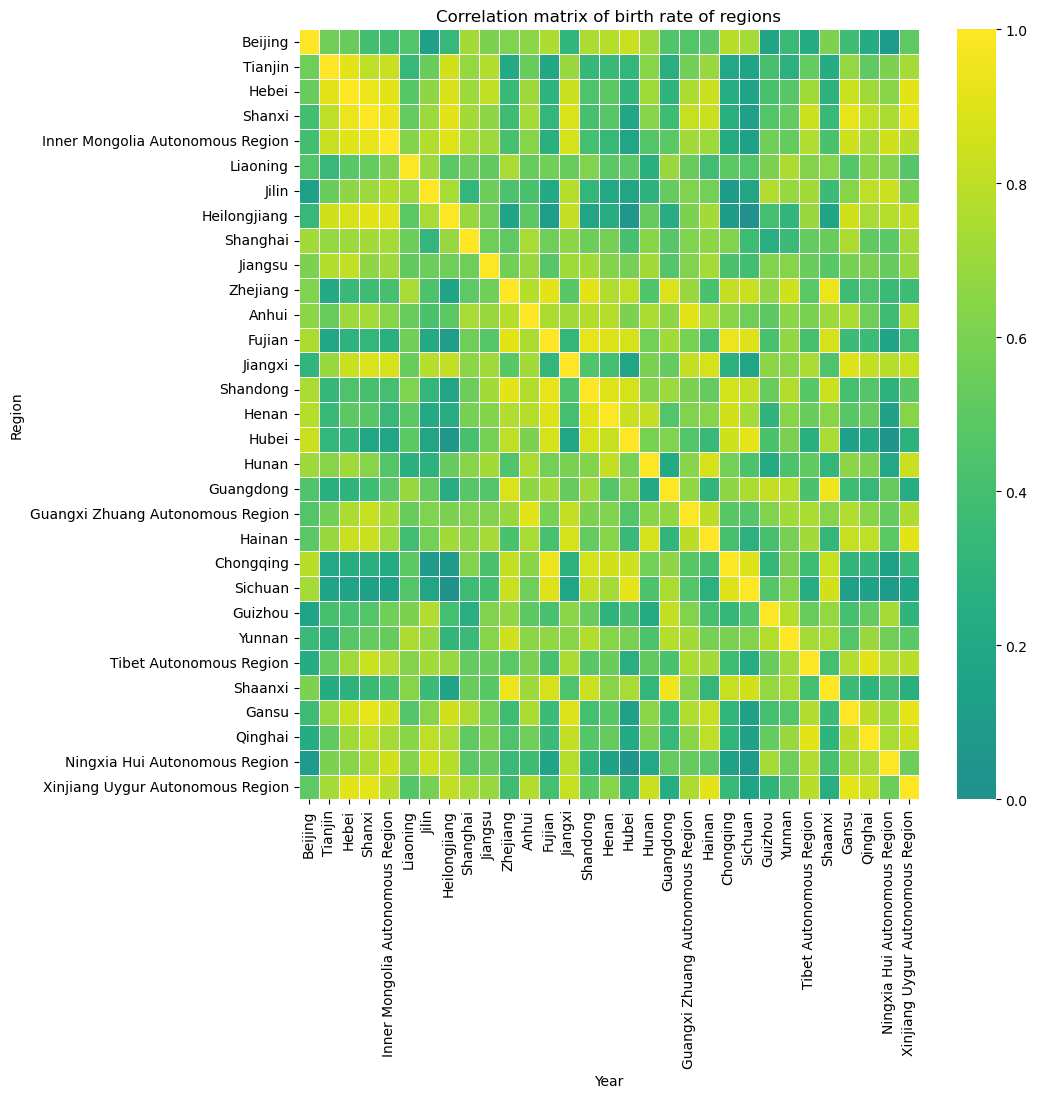

In [8]:
plt.figure(figsize=(10, 10))
birthrate_corr_colors = (birthrate_corr - birthrate_corr.min().min() )
birthrate_corr_colors = birthrate_corr_colors * (1/birthrate_corr_colors.max().max())
ax = sns.heatmap(birthrate_corr_colors, cmap='viridis',
            fmt="d", linewidths=0.5, center=0)
plt.title('Correlation matrix of birth rate of regions')
plt.xlabel('Year')
plt.ylabel('Region')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

The correlation matrix above doesn't suggest any strong correlation between different provinces in terms of the birth rate, indicating the heterogeneity among the provinces.

#### 2.1.2 Data Analysis of Nominal GDP per capita
In order to make the data comparable across provinces, we will calculate Nominal GDP per capita using the Nominal GDP and the population of permanent residents of each province. We are going to attaining the provincial data of Nominal GDP per capita using the formula below:
$$ \text{Nominal GDP per Capita} = \frac{\text{Nominal GDP}}{\text{Population}}. $$

In [9]:
NGDP = pd.read_csv("cleaned-data/3_NGDP.csv")
NGDP.head()

Region     2019     2018     2017     2016  \
0                           Beijing  35445.1  33106.0  29883.0  27041.2   
1                           Tianjin  14055.5  13362.9  12450.6  11477.2   
2                             Hebei  34978.6  32494.6  30640.8  28474.1   
3                            Shanxi  16961.6  15958.1  14484.3  11946.4   
4  Inner Mongolia Autonomous Region  17212.5  16140.8  14898.1  13789.3   

      2015     2014     2013     2012     2011     2010     2009     2008  \
0  24779.1  22926.0  21134.6  19024.7  17188.8  14964.0  12900.9  11813.1   
1  10879.5  10640.6   9945.4   9043.0   8112.5   6830.8   5709.6   5182.4   
2  26398.4  25208.9  24259.6  23077.5  21384.7  18003.6  15306.9  14200.1   
3  11836.4  12094.7  11987.2  11683.1  10894.4   8903.9   7147.6   7223.0   
4  12949.0  12158.2  11392.4  10470.1   9458.1   8199.9   7104.2   6242.4   

      2007     2006  
0  10425.5   8387.0  
1   4158.4   3538.2  
2  12152.9  10043.0  
3   5935.6   4713.6  
4   5166.9   4161.8

In [10]:
population = pd.read_csv("cleaned-data/2_population.csv")
population.head()

Region  2019  2018  2017  2016  2015  2014  2013  \
0                           Beijing  2190  2192  2194  2195  2188  2171  2125   
1                           Tianjin  1385  1383  1410  1443  1439  1429  1410   
2                             Hebei  7447  7426  7409  7375  7345  7323  7288   
3                            Shanxi  3497  3502  3510  3514  3519  3528  3535   
4  Inner Mongolia Autonomous Region  2415  2422  2433  2436  2440  2449  2455   

   2012  2011  2010  2009  2008  2007  2006  
0  2078  2024  1962  1860  1771  1676  1601  
1  1378  1341  1299  1228  1176  1115  1075  
2  7262  7232  7194  7034  6989  6943  6898  
3  3548  3562  3574  3427  3411  3393  3375  
4  2464  2470  2472  2458  2444  2429  2415

In [11]:
merged = pd.merge(NGDP, population, on='Region')

merged['2019'] = merged['2019_x'] / merged['2019_y']
merged['2018'] = merged['2018_x'] / merged['2018_y']
merged['2017'] = merged['2019_x'] / merged['2019_y']
merged['2016'] = merged['2016_x'] / merged['2016_y']
merged['2015'] = merged['2015_x'] / merged['2015_y']
merged['2014'] = merged['2014_x'] / merged['2014_y']
merged['2013'] = merged['2013_x'] / merged['2013_y']
merged['2012'] = merged['2012_x'] / merged['2012_y']
merged['2011'] = merged['2011_x'] / merged['2011_y']
merged['2010'] = merged['2010_x'] / merged['2010_y']
merged['2009'] = merged['2009_x'] / merged['2009_y']
merged['2008'] = merged['2008_x'] / merged['2008_y']
merged['2007'] = merged['2007_x'] / merged['2007_y']
merged['2006'] = merged['2006_x'] / merged['2006_y']

ngdp_per_capita = merged.iloc[:, [0,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
ngdp_per_capita.head()

Region       2019       2018       2017  \
0                           Beijing  16.184977  15.103102  16.184977   
1                           Tianjin  10.148375   9.662256  10.148375   
2                             Hebei   4.697006   4.375788   4.697006   
3                            Shanxi   4.850329   4.556853   4.850329   
4  Inner Mongolia Autonomous Region   7.127329   6.664244   7.127329   

        2016       2015       2014      2013      2012      2011      2010  \
0  12.319453  11.325000  10.560111  9.945694  9.155294  8.492490  7.626911   
1   7.953708   7.560459   7.446186  7.053475  6.562409  6.049590  5.258507   
2   3.860895   3.594064   3.442428  3.328705  3.177844  2.956955  2.502585   
3   3.399659   3.363569   3.428203  3.391004  3.292869  3.058506  2.491298   
4   5.660632   5.306967   4.964557  4.640489  4.249229  3.829190  3.317112   

       2009      2008      2007      2006  
0  6.935968  6.670299  6.220465  5.238601  
1  4.649511  4.406803  3.729507  3.291349  
2  2.176130  2.031779  1.750382  1.455929  
3  2.085673  2.117561  1.749366  1.396622  
4  2.890236  2.554173  2.127172  1.723313

In [12]:
ngdp_per_capita.describe()

2019       2018       2017       2016       2015       2014  \
count  31.000000  31.000000  31.000000  31.000000  31.000000  31.000000   
mean    6.874240   6.428165   6.874240   5.309175   4.937917   4.669268   
std     3.101732   2.936479   3.101732   2.431799   2.215270   2.052659   
min     3.474811   3.222306   3.474811   2.741230   2.598732   2.494724   
25%     4.888444   4.543684   4.888444   3.870482   3.539666   3.435315   
50%     5.551886   5.155883   5.551886   4.273981   3.951534   3.772332   
75%     7.534667   6.963664   7.534667   5.843668   5.455470   5.070716   
max    16.184977  15.103102  16.184977  12.319453  11.325000  10.560111   

            2013       2012       2011       2010       2009       2008  \
count  31.000000  31.000000  31.000000  31.000000  31.000000  31.000000   
mean    4.344792   3.970445   3.617963   3.091418   2.650944   2.464197   
std     1.928088   1.814868   1.742264   1.615138   1.494381   1.435141   
min     2.195237   1.879621   1.590822   1.298936   1.090387   0.974555   
25%     3.251177   2.958459   2.618698   2.154314   1.752913   1.597454   
50%     3.533696   3.233687   2.956955   2.482938   2.026720   1.930554   
75%     4.749154   4.337084   3.935542   3.427564   3.035827   2.845671   
max     9.945694   9.155294   8.493081   7.779158   7.123258   6.789771   

            2007       2006  
count  31.000000  31.000000  
mean    2.116261   1.757959  
std     1.338889   1.156927  
min     0.784003   0.613577  
25%     1.313620   1.075172  
50%     1.602066   1.322993  
75%     2.409991   2.001029  
max     6.239680   5.396589

In [13]:
ngdp_per_capita_long = pd.melt(ngdp_per_capita, id_vars="Region", var_name="Year",
                      value_name="ngdp_per_capita")
ngdp_per_capita_long.sort_values(by="Year", inplace=True)

In [14]:
ngdp_per_capita_long.head()

Region  Year  ngdp_per_capita
433  Xinjiang Uygur Autonomous Region  2006         1.442585
403                           Beijing  2006         5.238601
404                           Tianjin  2006         3.291349
405                             Hebei  2006         1.455929
406                            Shanxi  2006         1.396622

#### Line chart of Nominal GDP per capita trend for each province

In [15]:
from scripts import generate_eda as eda

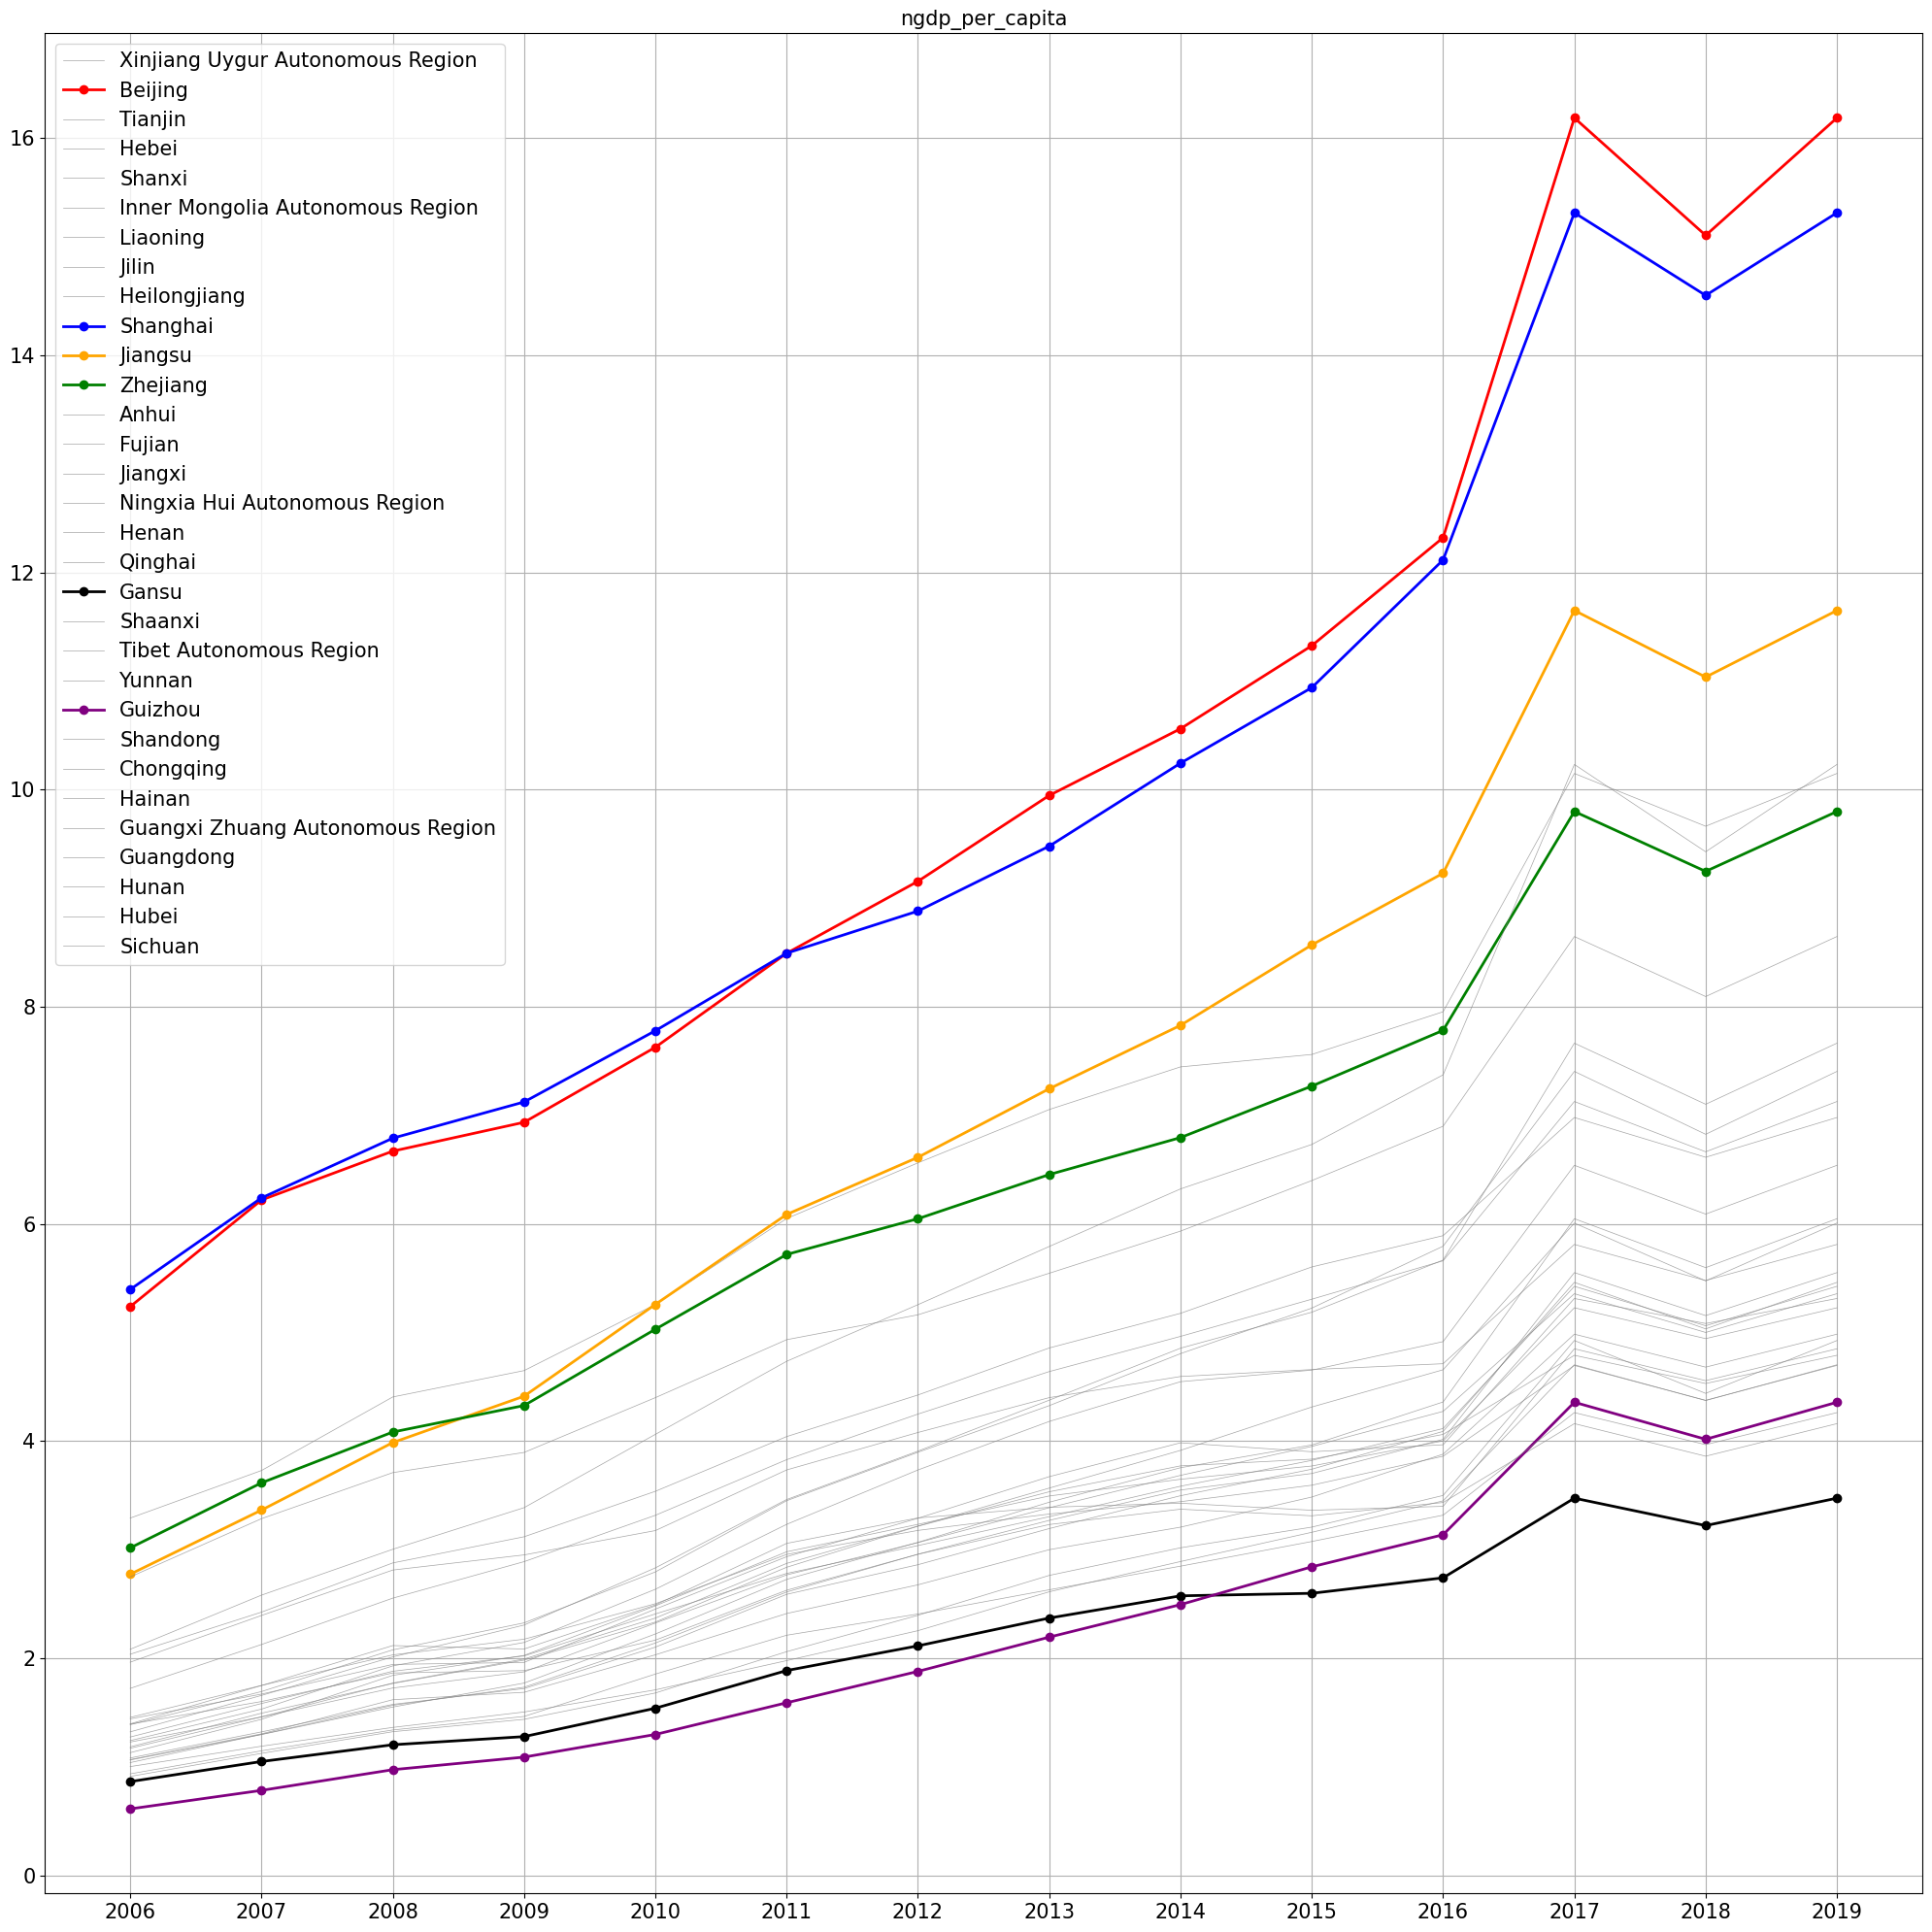

In [16]:
configs = {
    "FONT_SIZE": 15, 
    "FIGSIZE": (20, 20)
}

plot_title = "NGDP per capita by region"

exceptions = {
    "Beijing": "red",
    "Shanghai": "blue",
    "Zhejiang": "green",
    "Jiangsu": "orange",
    "Guizhou": "purple",
    "Gansu": "black"
}

fig = eda.line_plots(ngdp_per_capita, plot_title,"ngdp_per_capita", exceptions, configs)

The graph above shows the time series of Nominal Gross Domestic Product (NGDP) per capita for different regions of China from 2006 to 2019. The x-axis represents an annual time scale from 2006 to 2019. The y-axis represents the NGDP per capita in 10 thousand yuan. The NGDP per capita ranges from around 6 to over 16 (10 thousand yuan). The graph is useful for comparing economic growth across regions and identifying both long-term trends and short-term variations in economic performance.

Most lines show an overall upward trend in all regions, suggesting an increase in NGDP per capita over the 14-year period. It shows that the **Beijing**, the capital of China, and **Shanghai**, the business center of China, are in the leading position in terms of NGDP per capita. In general, it also shows a strong regional identity: provinces on the eastern coast (such as **Zhejiang and Jiangsu**) grow faster than inland western areas (such as **Guizhou and Gansu**) and have higher levels of NGDP per capita. Moreover, 2017 witnessed a sharper increase in all regions compared to the previous years, which is a result of the export recovery (BBC, 2018).

#### Correlation matrix of provincial Nominal GDP per capita

In [17]:
ngdp_per_capita_transpose = ngdp_per_capita.T
ngdp_per_capita_transpose.columns = ngdp_per_capita_transpose.iloc[0]
ngdp_per_capita_transpose = ngdp_per_capita_transpose[1:].astype(float)
ngdp_per_capita_corr = ngdp_per_capita_transpose.corr(numeric_only=True) # correlation matrix
ngdp_per_capita_corr.head()

Region                             Beijing   Tianjin     Hebei    Shanxi  \
Region                                                                     
Beijing                           1.000000  0.988898  0.980450  0.973583   
Tianjin                           0.988898  1.000000  0.997061  0.990521   
Hebei                             0.980450  0.997061  1.000000  0.987707   
Shanxi                            0.973583  0.990521  0.987707  1.000000   
Inner Mongolia Autonomous Region  0.989211  0.998316  0.997289  0.982382   

Region                            Inner Mongolia Autonomous Region  Liaoning  \
Region                                                                         
Beijing                                                   0.989211  0.972862   
Tianjin                                                   0.998316  0.995093   
Hebei                                                     0.997289  0.996483   
Shanxi                                                    0.982382  0.986889   
Inner Mongolia Autonomous Region                          1.000000  0.994090   

Region                               Jilin  Heilongjiang  Shanghai   Jiangsu  \
Region                                                                         
Beijing                           0.964087      0.962535  0.999198  0.993001   
Tianjin                           0.989899      0.989514  0.987297  0.997053   
Hebei                             0.994455      0.992583  0.979267  0.994595   
Shanxi                            0.974623      0.980166  0.969812  0.979356   
Inner Mongolia Autonomous Region  0.991621      0.988354  0.988459  0.999074   

Region                            ...  Chongqing   Sichuan   Guizhou  \
Region                            ...                                  
Beijing                           ...   0.993246  0.995490  0.998196   
Tianjin                           ...   0.995619  0.998065  0.988440   
Hebei                             ...   0.992944  0.992875  0.980253   
Shanxi                            ...   0.975697  0.985911  0.966769   
Inner Mongolia Autonomous Region  ...   0.998150  0.997112  0.990666   

Region                              Yunnan  Tibet Autonomous Region   Shaanxi  \
Region                                                                          
Beijing                           0.997983                 0.998642  0.987071   
Tianjin                           0.993177                 0.989573  0.998935   
Hebei                             0.985762                 0.980809  0.996496   
Shanxi                            0.977098                 0.969330  0.985785   
Inner Mongolia Autonomous Region  0.993352                 0.991032  0.998518   

Region                               Gansu   Qinghai  \
Region                                                 
Beijing                           0.982211  0.995864   
Tianjin                           0.996766  0.996124   
Hebei                             0.995992  0.992091   
Shanxi                            0.982387  0.978491   
Inner Mongolia Autonomous Region  0.997004  0.997536   

Region                            Ningxia Hui Autonomous Region  \
Region                                                            
Beijing                                                0.982703   
Tianjin                                                0.998856   
Hebei                                                  0.998866   
Shanxi                                                 0.991650   
Inner Mongolia Autonomous Region                       0.997278   

Region                            Xinjiang Uygur Autonomous Region  
Region                                                              
Beijing                                                   0.982323  
Tianjin                                                   0.997218  
Hebei                                                     0.993042  
Shanxi                                                    0.9885

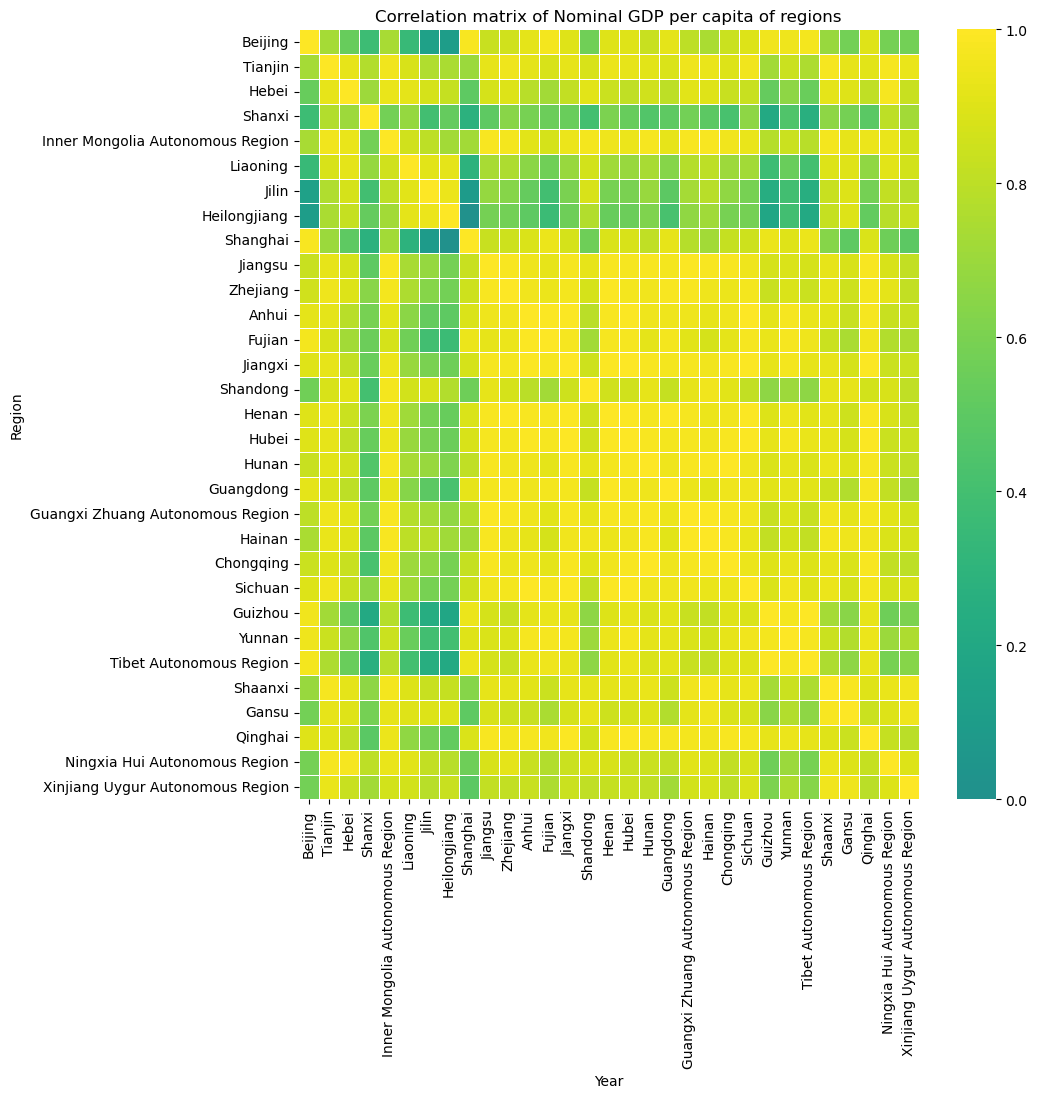

In [18]:
plt.figure(figsize=(10, 10))
ngdp_per_capita_corr_colors = (ngdp_per_capita_corr - ngdp_per_capita_corr.min().min() )
ngdp_per_capita_corr_colors = ngdp_per_capita_corr_colors * (1/ngdp_per_capita_corr_colors.max().max())
ax = sns.heatmap(ngdp_per_capita_corr_colors, cmap='viridis',
            fmt="d", linewidths=0.5, center=0)
plt.title('Correlation matrix of Nominal GDP per capita of regions')
plt.xlabel('Year')
plt.ylabel('Region')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

The correlation matrix above shows that the NGDP per capita of most provinces shows a strong colinear relationship while **Shanxi, Liaoning, Jilin, and Heilongjiang** exhibit weaker correlation with others, implying that those regions didn't keep pace with the overall trend compared to other provinces. Geographically, Shanxi lies in the inland north of China and Liaoning, Jilin, and Heilongjiang lie in the northeast. 

The Northeast has an advantage in the rapid development of industrialization due to historical reasons, but it failed to transform and upgrade the industrial structure in the past two decades. In the last century, the development of heavy industry in the northeast led to the existence of a large number of state-owned enterprises. The culture of state-owned enterprises and the relatively conservative business environment further limit the sustained growth of the economy in those provinces. Shanxi faces same industrial transformation problem as the Northeast area.

#### 2.1.3 Data Analysis of average wage

In [19]:
wage = pd.read_csv("cleaned-data/4_average wage.csv")
wage.head()

Region    2019    2018    2017    2016    2015  \
0                           Beijing  145766  131700  119928  111390  102268   
1                           Tianjin  100731   94534   86305   80090   72773   
2                             Hebei   68717   63036   55334   50921   45114   
3                            Shanxi   65917   60061   53705   51803   48969   
4  Inner Mongolia Autonomous Region   73835   66679   61067   57135   53748   

    2014   2013   2012   2011   2010   2009   2008   2007   2006  
0  93006  84742  68174  59427  49722  44961  42328  34692  29992  
1  67773  61514  66928  57367  41973  37444  35101  30378  25586  
2  41501  38658  38105  31546  26191  22983  20283  16489  13823  
3  46407  44236  40029  33225  26672  23273  20731  17301  14328  
4  50723  46557  42297  36324  28760  24834  21197  17855  14977

In [20]:
wage.describe()

2019           2018           2017           2016  \
count      31.000000      31.000000      31.000000      31.000000   
mean    80879.903226   73351.709677   67011.870968   61764.806452   
std     19887.954261   18655.046113   17475.427729   16265.241415   
min     60780.000000   55495.000000   49505.000000   45403.000000   
25%     70413.500000   63532.000000   57726.500000   52460.500000   
50%     74378.000000   67727.000000   61663.000000   57270.000000   
75%     81808.000000   73748.000000   66434.000000   60816.500000   
max    145766.000000  131700.000000  119935.000000  111390.000000   

                2015          2014          2013          2012          2011  \
count      31.000000     31.000000     31.000000     31.000000     31.000000   
mean    55217.645161  50658.032258  45816.354839  40260.548387  34216.032258   
std     13864.212743  12598.210604  11087.171017  10699.507212   9277.699232   
min     42179.000000  38301.000000  36386.000000  27959.000000  22636.000000   
25%     47038.500000  42839.500000  38814.500000  32730.500000  27628.000000   
50%     51825.000000  47446.000000  43073.000000  37251.000000  31516.000000   
75%     56336.000000  51058.000000  46996.500000  42902.500000  37268.500000   
max    102268.000000  93006.000000  84742.000000  68174.000000  59427.000000   

               2010          2009          2008          2007          2006  
count     31.000000     31.000000     31.000000     31.000000     31.000000  
mean   27423.225806  23770.483871  21135.032258  17978.032258  14839.741935  
std     6926.298827   6540.602479   6349.368454   5319.142954   4571.682338  
min    17629.000000  14758.000000  12645.000000  11072.000000   9315.000000  
25%    23070.500000  19578.500000  17263.500000  14648.500000  12034.500000  
50%    25056.000000  20955.000000  18828.000000  16014.000000  13427.000000  
75%    28966.000000  25139.500000  22312.500000  19826.500000  16163.500000  
max    49722.000000  44961.000000  42328.000000  34692.000000  29992.000000

In [21]:
wage_long = pd.melt(wage, id_vars="Region", var_name="Year",
                      value_name="wage")
wage_long.sort_values(by="Year", inplace=True)

In [22]:
wage_long.head()

Region  Year   wage
433  Xinjiang Uygur Autonomous Region  2006  17062
403                           Beijing  2006  29992
404                           Tianjin  2006  25586
405                             Hebei  2006  13823
406                            Shanxi  2006  14328

#### Line chart of average wage for each province

In [23]:
from scripts import generate_eda as eda

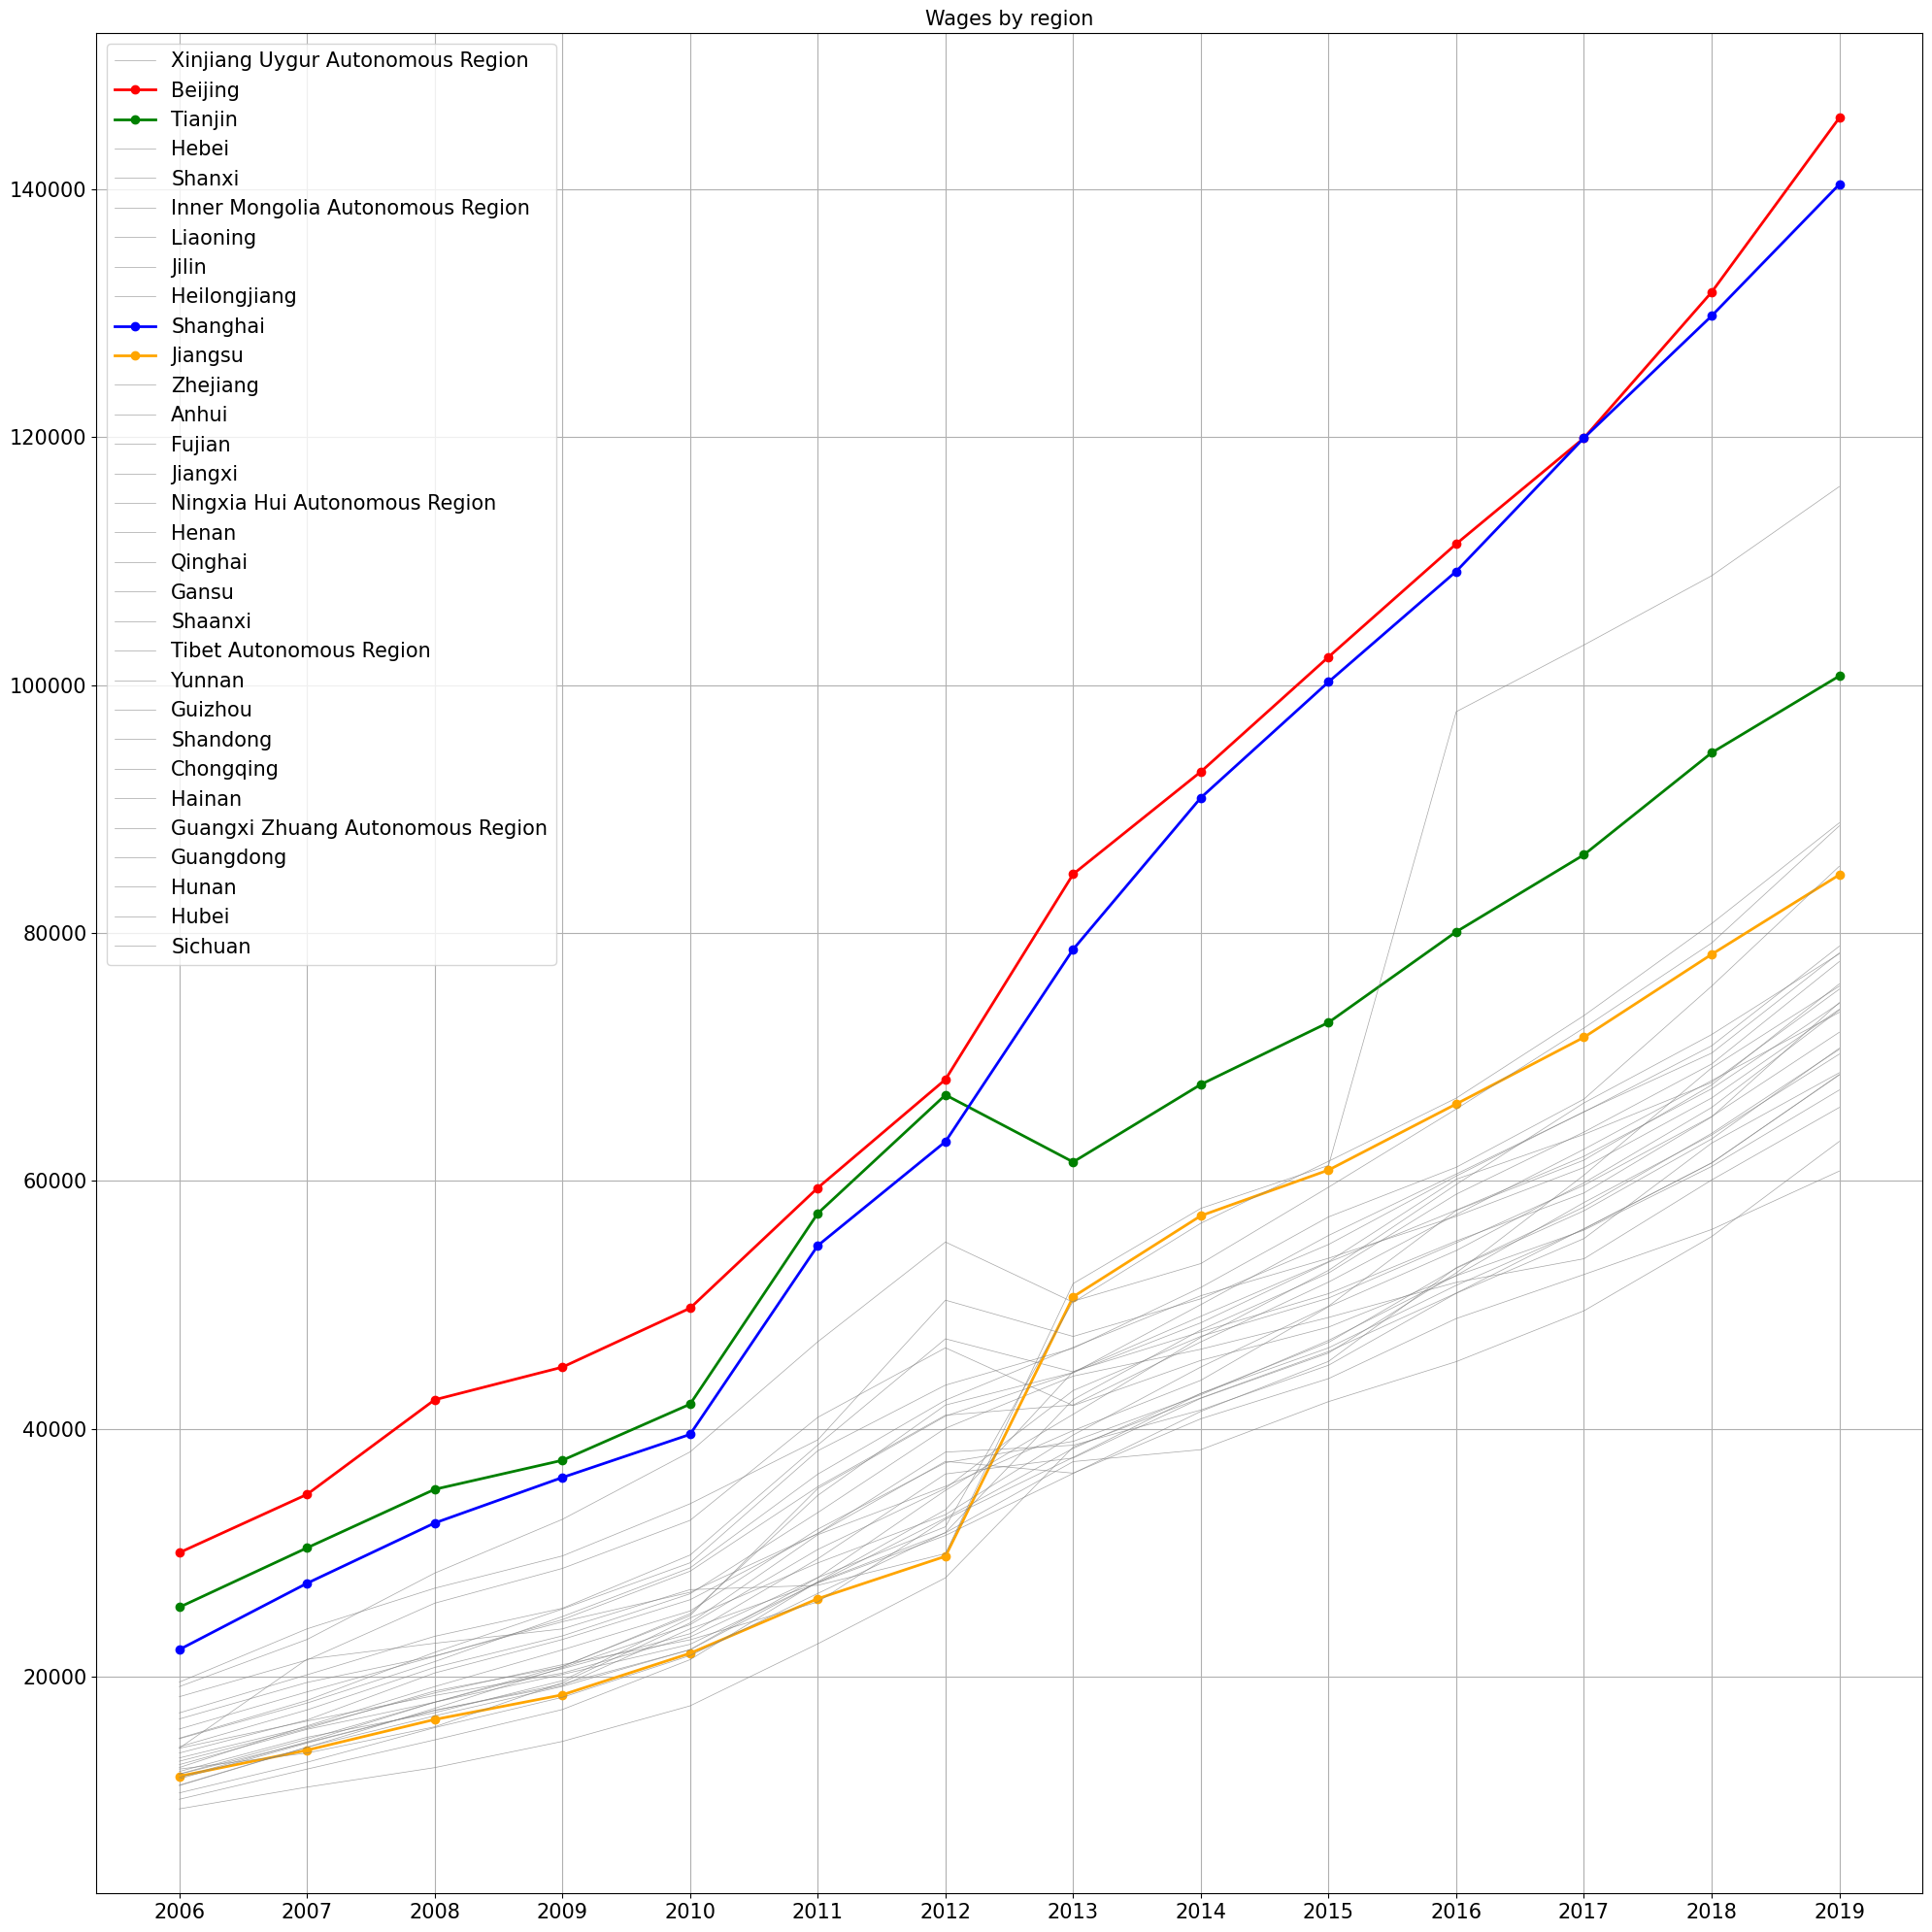

In [24]:
configs = {
    "FONT_SIZE": 15, 
    "FIGSIZE": (20, 20)
}
plot_title = "Wages by region"
exceptions = {
    "Beijing": "red",
    "Shanghai": "blue",
    "Tianjin": "green",
    "Jiangsu": "orange",
}
fig = eda.line_plots(wage, "wage", plot_title, exceptions, configs)

The graph above shows the time series of the annual average wage of state-owned businesses for different regions of China from 2006 to 2019. The x-axis represents an annual time scale from 2006 to 2019. The y-axis represents the annual average wage (yuan). The divergence in income trajectories among regions can be a point of discussion regarding economic balance and equity within the country.

Most lines show an overall upward trend in all regions, suggesting an increase in the average wage of employees working in the state-owned business over the 14 years. It shows that employees of state-owned businesses earned the highest wage in **Beijing, Shanghai and Tianjin** before 2015. In 2016, the average wage of **Jiangsu** surpassed Tianjin and ranked third.

#### Correlation matrix of provincial total wages of employed persons in urban units

In [25]:
wage_transpose = wage.T
wage_transpose.columns = wage_transpose.iloc[0]
wage_transpose = wage_transpose[1:].astype(float)
wage_corr = wage_transpose.corr(numeric_only=True) # correlation matrix
wage_corr.head()

Region                             Beijing   Tianjin     Hebei    Shanxi  \
Region                                                                     
Beijing                           1.000000  0.979892  0.991177  0.987305   
Tianjin                           0.979892  1.000000  0.993484  0.990703   
Hebei                             0.991177  0.993484  1.000000  0.989451   
Shanxi                            0.987305  0.990703  0.989451  1.000000   
Inner Mongolia Autonomous Region  0.991348  0.992623  0.992787  0.998915   

Region                            Inner Mongolia Autonomous Region  Liaoning  \
Region                                                                         
Beijing                                                   0.991348  0.967923   
Tianjin                                                   0.992623  0.995953   
Hebei                                                     0.992787  0.989155   
Shanxi                                                    0.998915  0.985975   
Inner Mongolia Autonomous Region                          1.000000  0.987348   

Region                               Jilin  Heilongjiang  Shanghai   Jiangsu  \
Region                                                                         
Beijing                           0.999348      0.991762  0.998628  0.993551   
Tianjin                           0.984651      0.995245  0.981332  0.957674   
Hebei                             0.994315      0.997669  0.988396  0.971477   
Shanxi                            0.988925      0.990817  0.987221  0.975816   
Inner Mongolia Autonomous Region  0.993115      0.994762  0.991559  0.979646   

Region                            ...  Chongqing   Sichuan   Guizhou  \
Region                            ...                                  
Beijing                           ...   0.994499  0.999503  0.998678   
Tianjin                           ...   0.993811  0.976924  0.982793   
Hebei                             ...   0.994524  0.988296  0.992192   
Shanxi                            ...   0.995330  0.985500  0.985020   
Inner Mongolia Autonomous Region  ...   0.998268  0.990009  0.990112   

Region                              Yunnan  Tibet Autonomous Region   Shaanxi  \
Region                                                                          
Beijing                           0.992230                 0.969215  0.997482   
Tianjin                           0.986880                 0.928419  0.986643   
Hebei                             0.997632                 0.953763  0.992516   
Shanxi                            0.980997                 0.926149  0.995144   
Inner Mongolia Autonomous Region  0.986419                 0.936608  0.997687   

Region                               Gansu   Qinghai  \
Region                                                 
Beijing                           0.998548  0.994097   
Tianjin                           0.979538  0.992470   
Hebei                             0.992792  0.998260   
Shanxi                            0.982658  0.992115   
Inner Mongolia Autonomous Region  0.987784  0.995565   

Region                            Ningxia Hui Autonomous Region  \
Region                                                            
Beijing                                                0.985419   
Tianjin                                                0.996142   
Hebei                                                  0.996950   
Shanxi                                                 0.991557   
Inner Mongolia Autonomous Region                       0.993469   

Region                            Xinjiang Uygur Autonomous Region  
Region                                                              
Beijing                                                   0.985845  
Tianjin                                                   0.998385  
Hebei                                                     0.994988  
Shanxi                                                    0.9930

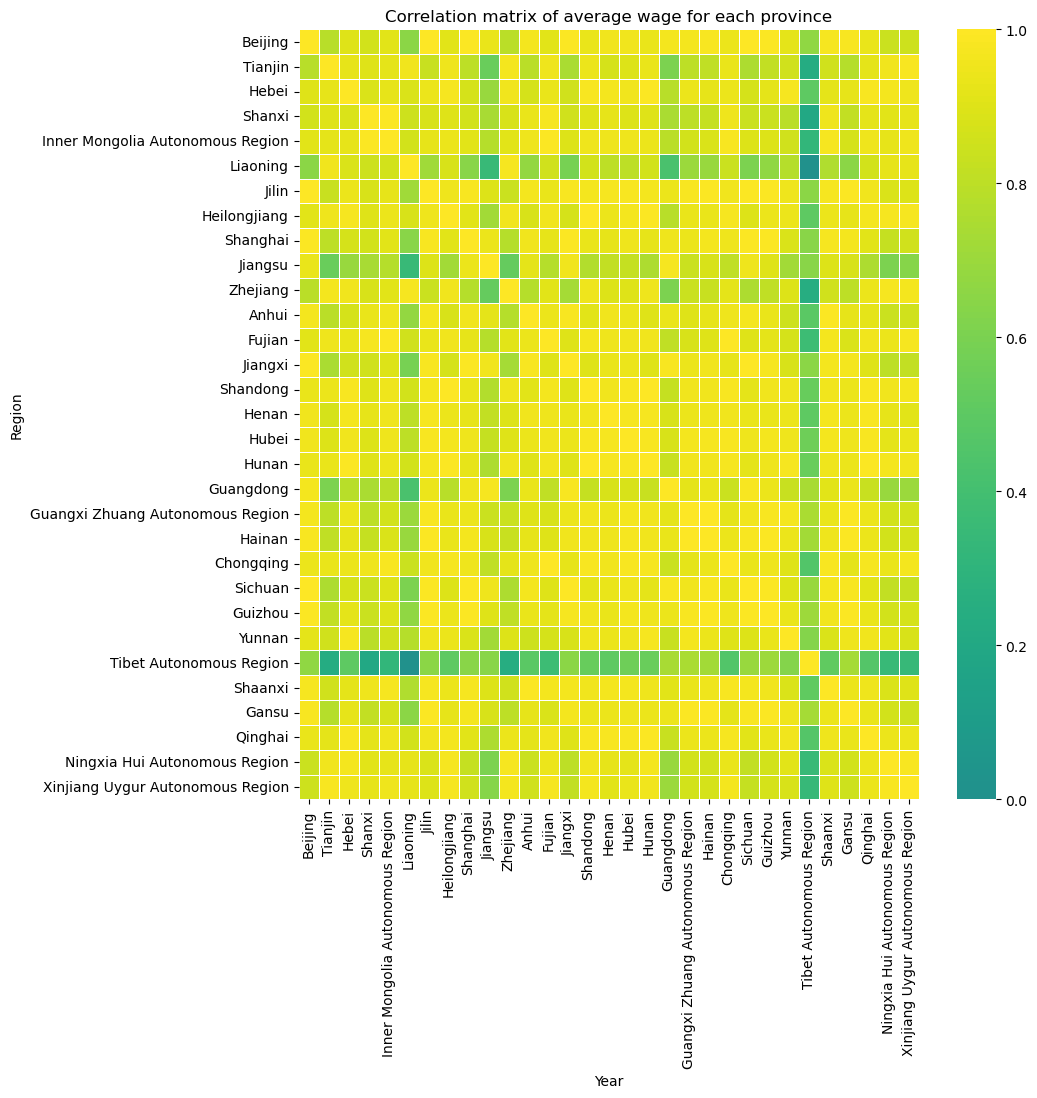

In [26]:
plt.figure(figsize=(10, 10))
wage_corr_colors = (wage_corr - wage_corr.min().min() )
wage_corr_colors = wage_corr_colors * (1/wage_corr_colors.max().max())
ax = sns.heatmap(wage_corr_colors, cmap='viridis',
            fmt="d", linewidths=0.5, center=0)
plt.title('Correlation matrix of average wage for each province')
plt.xlabel('Year')
plt.ylabel('Region')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

The correlation matrix above shows that the average wage of employees working in the state-owned business of all provinces shows a strong colinear relationship except **Tibet**. A notable reason for the low average wage is the constraints of geography. The high terrain, cold climate, and relatively harsh natural conditions in Tibet make it hard to develop traditional industries such as agriculture and animal husbandry. The land is unsuitable for large-scale agricultural production, and transportation is inconvenient. Therefore, it is difficult for the region to integrate into the wider economic cycle, resulting in a relative lag in economic development.

#### 2.1.4 Data Analysis of Disposable Income per capita

In [27]:
income = pd.read_csv("cleaned-data/5_disposable income per capita .csv")
income.head()

Region   2019   2018   2017   2016   2015   2014  \
0                           Beijing  67756  62361  57230  52530  48458  44489   
1                           Tianjin  42404  39506  37022  34074  31291  28832   
2                             Hebei  25665  23446  21484  19725  18118  16647   
3                            Shanxi  23828  21990  20420  19049  17854  16538   
4  Inner Mongolia Autonomous Region  30555  28376  26212  24127  22310  20559   

    2013   2012   2011   2010   2009   2008   2007   2006  
0  40830  36817  33176  29228  26571  24371  21458  19296  
1  26359  24030  21714  19266  16967  15444  13116  11526  
2  15190  13647  12059  10428   9267   8365   7233   6295  
3  15120  13592  11959  10149   8911   8333   7282   6235  
4  18693  16800  14715  12538  11015   9923   8340   6876

In [28]:
income.describe()

2019          2018          2017          2016          2015  \
count     31.000000     31.000000     31.000000     31.000000     31.000000   
mean   30643.225806  28166.129032  25923.354839  23793.838710  21912.290323   
std    12367.153183  11465.457690  10568.898279   9743.497234   8988.464397   
min    19139.000000  17286.000000  15457.000000  13639.000000  12254.000000   
25%    23865.500000  21977.000000  20295.000000  18625.500000  17173.000000   
50%    26262.000000  23984.000000  21863.000000  19998.000000  18593.000000   
75%    31708.500000  29453.000000  27382.500000  25362.500000  23639.500000   
max    69442.000000  64183.000000  58988.000000  54305.000000  49867.000000   

               2014          2013          2012          2011          2010  \
count     31.000000     31.000000     31.000000     31.000000     31.000000   
mean   20097.516129  18282.064516  16469.161290  14533.000000  12526.032258   
std     8327.888463   7680.405610   7039.708972   6431.634292   5719.659707   
min    10730.000000   9740.000000   8568.000000   7510.000000   6628.000000   
25%    15722.000000  14217.500000  12762.500000  11168.000000   9466.000000   
50%    17404.000000  15733.000000  14180.000000  12392.000000  10428.000000   
75%    21842.000000  19913.000000  17944.000000  15753.000000  13437.500000   
max    45966.000000  42174.000000  38550.000000  34731.000000  30436.000000   

               2009          2008          2007          2006  
count     31.000000     31.000000     31.000000     31.000000  
mean   11057.258065  10078.580645   8736.774194   7532.516129  
std     5200.090973   4811.233091   4298.871478   3894.514012  
min     5807.000000   5249.000000   4609.000000   3828.000000  
25%     8320.000000   7525.000000   6407.500000   5321.500000  
50%     9267.000000   8365.000000   7282.000000   6295.000000  
75%    11790.500000  10768.000000   9253.000000   7866.000000  
max    27500.000000  25385.000000  22459.000000  19647.000000

In [29]:
income_long = pd.melt(income, id_vars="Region", var_name="Year",
                      value_name="disposable_income")
income_long.sort_values(by="Year", inplace=True)

In [30]:
income_long.head()

Region  Year  disposable_income
433  Xinjiang Uygur Autonomous Region  2006               5290
403                           Beijing  2006              19296
404                           Tianjin  2006              11526
405                             Hebei  2006               6295
406                            Shanxi  2006               6235

#### Line chart of disposable income trend for each province

In [31]:
from scripts import generate_eda as eda

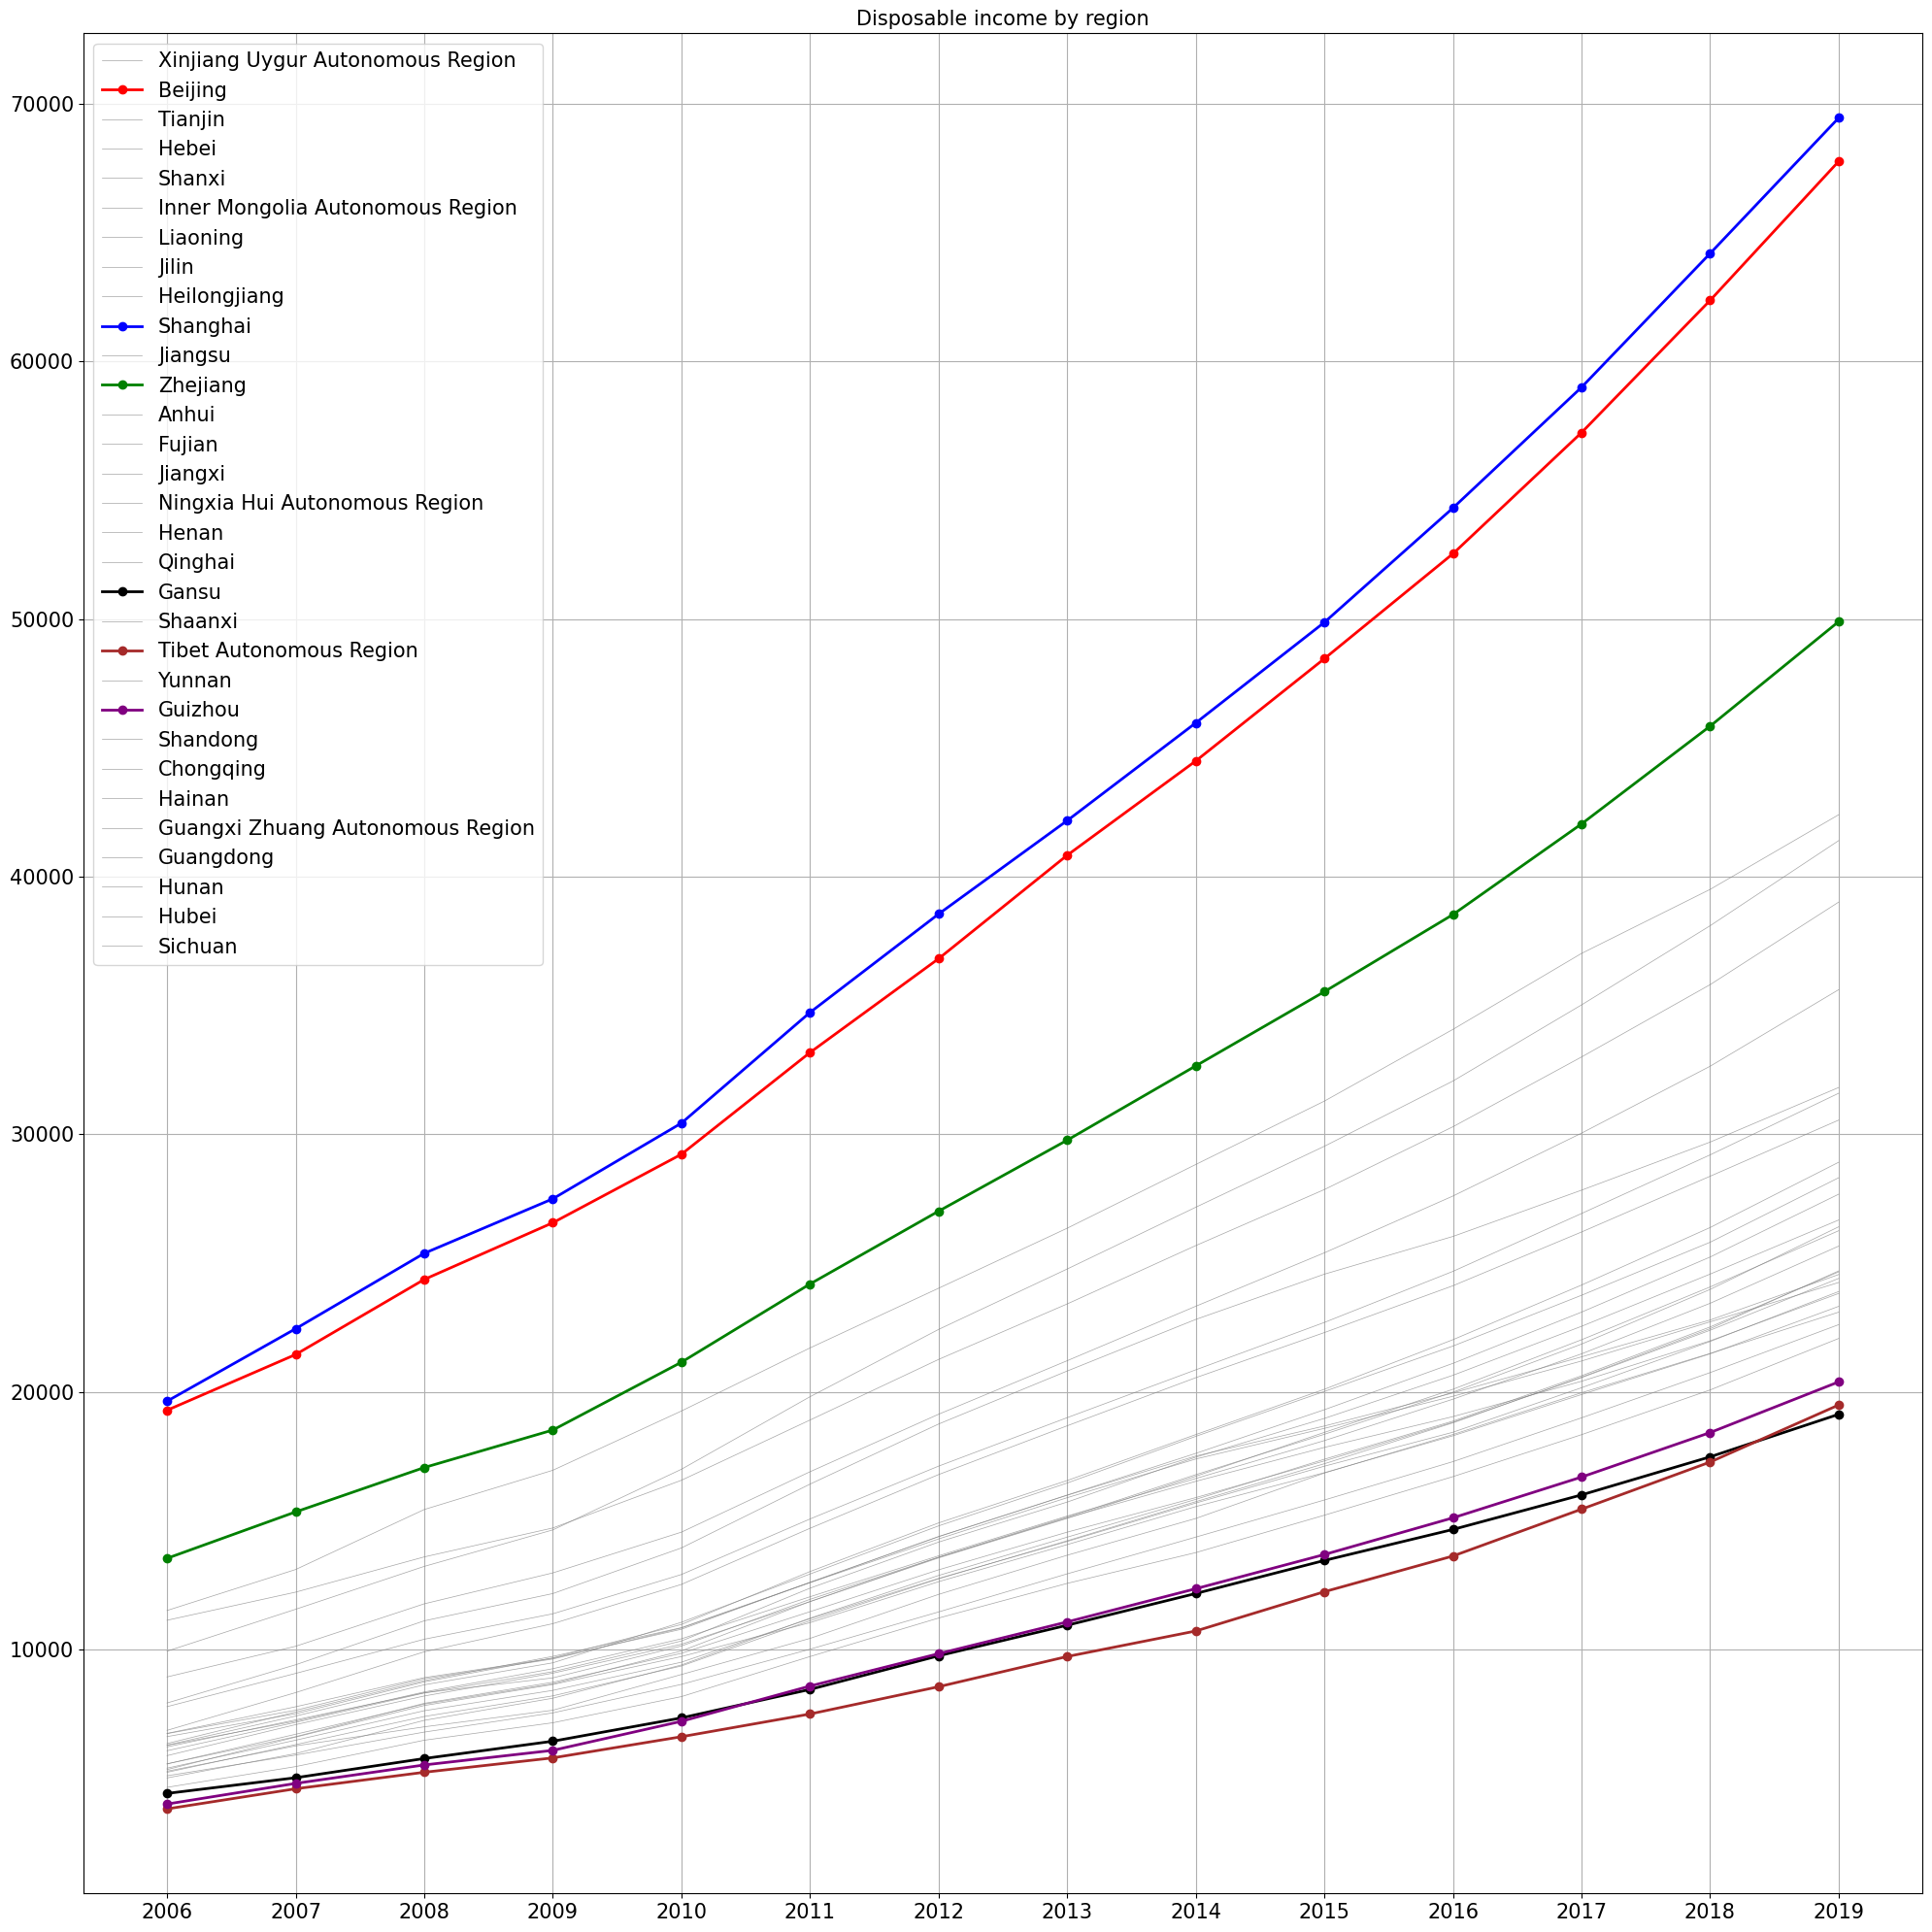

In [32]:
configs = {
    "FONT_SIZE": 15, 
    "FIGSIZE": (20, 20)
}
plot_title = "Disposable income by region"
exceptions = {
    "Beijing": "red",
    "Shanghai": "blue",
    "Zhejiang": "green",
    "Guizhou": "purple",
    "Gansu": "black",
    "Tibet Autonomous Region": "brown"
}
fig = eda.line_plots(income, "disposable_income", plot_title, exceptions,  configs)

The graph of disposable income per capita is in line with the graph of average wage: **Beijing, Shanghai** rank the top two. Interestingly, the time series of disposable income of most provinces exhibit a parallel relationship. In general, the south-eastern provinces with higher economic development levels (such as **Zhejiang**) have higher disposable income than the inland provinces (such as **Guizhou, Tibet and Gansu**).

#### Correlation matrix of provincial disposable income per capita

In [33]:
income_transpose = income.T
income_transpose.columns = income_transpose.iloc[0]
income_transpose = income_transpose[1:].astype(float)
income_corr = income_transpose.corr(numeric_only=True) # correlation matrix
income_corr.head()

Region                             Beijing   Tianjin     Hebei    Shanxi  \
Region                                                                     
Beijing                           1.000000  0.998644  0.999805  0.997255   
Tianjin                           0.998644  1.000000  0.999177  0.998628   
Hebei                             0.999805  0.999177  1.000000  0.998395   
Shanxi                            0.997255  0.998628  0.998395  1.000000   
Inner Mongolia Autonomous Region  0.998188  0.999592  0.999059  0.999622   

Region                            Inner Mongolia Autonomous Region  Liaoning  \
Region                                                                         
Beijing                                                   0.998188  0.994000   
Tianjin                                                   0.999592  0.997363   
Hebei                                                     0.999059  0.995772   
Shanxi                                                    0.999622  0.999171   
Inner Mongolia Autonomous Region                          1.000000  0.998678   

Region                               Jilin  Heilongjiang  Shanghai   Jiangsu  \
Region                                                                         
Beijing                           0.996194      0.995928  0.999884  0.999275   
Tianjin                           0.998243      0.998295  0.999089  0.999483   
Hebei                             0.997553      0.997317  0.999876  0.999783   
Shanxi                            0.999836      0.999719  0.997726  0.999049   
Inner Mongolia Autonomous Region  0.999399      0.999377  0.998697  0.999540   

Region                            ...  Chongqing   Sichuan   Guizhou  \
Region                            ...                                  
Beijing                           ...   0.999835  0.999677  0.999792   
Tianjin                           ...   0.998776  0.999203  0.997920   
Hebei                             ...   0.999873  0.999961  0.999531   
Shanxi                            ...   0.998029  0.998702  0.996776   
Inner Mongolia Autonomous Region  ...   0.998601  0.999226  0.997484   

Region                              Yunnan  Tibet Autonomous Region   Shaanxi  \
Region                                                                          
Beijing                           0.999850                 0.996444  0.999161   
Tianjin                           0.998888                 0.991429  0.999540   
Hebei                             0.999922                 0.994838  0.999743   
Shanxi                            0.998087                 0.987947  0.999262   
Inner Mongolia Autonomous Region  0.998723                 0.989771  0.999704   

Region                               Gansu   Qinghai  \
Region                                                 
Beijing                           0.999788  0.999861   
Tianjin                           0.998636  0.998745   
Hebei                             0.999728  0.999765   
Shanxi                            0.997853  0.997784   
Inner Mongolia Autonomous Region  0.998401  0.998446   

Region                            Ningxia Hui Autonomous Region  \
Region                                                            
Beijing                                                0.999370   
Tianjin                                                0.999550   
Hebei                                                  0.999823   
Shanxi                                                 0.998913   
Inner Mongolia Autonomous Region                       0.999597   

Region                            Xinjiang Uygur Autonomous Region  
Region                                                              
Beijing                                                   0.998650  
Tianjin                                                   0.998803  
Hebei                                                     0.998959  
Shanxi                                                    0.9986

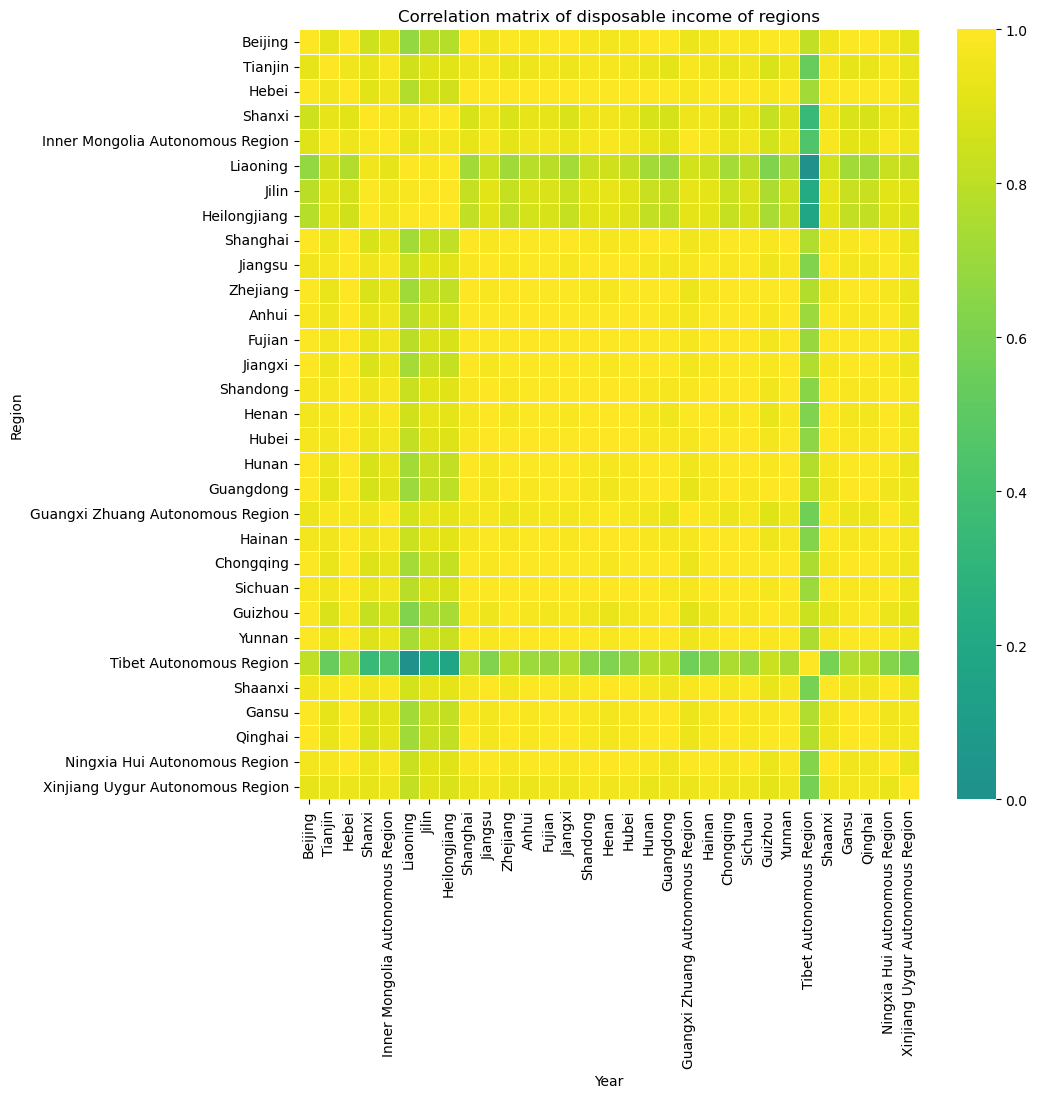

In [34]:
plt.figure(figsize=(10, 10))
income_corr_colors = (income_corr - income_corr.min().min() )
income_corr_colors = income_corr_colors * (1/income_corr_colors.max().max())
ax = sns.heatmap(income_corr_colors, cmap='viridis',
            fmt="d", linewidths=0.5, center=0)
plt.title('Correlation matrix of disposable income of regions')
plt.xlabel('Year')
plt.ylabel('Region')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

The correlation matrix above shows an extremely positive correlation on all province, indicating positive disposable income growth year by year for all of them. The growth rate of **Tibet** is significantly lower than that of other provinces.

### 2.1.5 Data Analysis of Unemployment rate

In [35]:
unemprate = pd.read_csv("cleaned-data/6_unemployment rate.csv")
unemprate.head()

Region  2019  2018  2017  2016  2015  2014  2013  \
0                           Beijing   1.3   1.4   1.4   1.4   1.4   1.3   1.2   
1                           Tianjin   3.5   3.5   3.5   3.5   3.5   3.5   3.6   
2                             Hebei   3.1   3.3   3.7   3.7   3.6   3.6   3.7   
3                            Shanxi   2.7   3.3   3.4   3.5   3.5   3.4   3.1   
4  Inner Mongolia Autonomous Region   3.7   3.6   3.6   3.7   3.7   3.6   3.7   

   2012  2011  2010  2009  2008  2007  2006  
0   1.3   1.4   1.4   1.4   1.8   1.8   2.0  
1   3.6   3.6   3.6   3.6   3.6   3.6   3.6  
2   3.7   3.8   3.9   3.9   4.0   3.8   3.8  
3   3.3   3.5   3.6   3.9   3.3   3.2   3.2  
4   3.7   3.8   3.9   4.0   4.1   4.0   4.1

In [36]:
unemprate.describe()

2019       2018       2017       2016       2015       2014  \
count  31.000000  31.000000  31.000000  31.000000  31.000000  31.000000   
mean    2.948387   3.106452   3.183871   3.258065   3.261290   3.277419   
std     0.589842   0.574999   0.636185   0.670708   0.666672   0.654069   
min     1.300000   1.400000   1.400000   1.400000   1.400000   1.300000   
25%     2.600000   2.800000   2.700000   2.900000   2.900000   3.050000   
50%     3.000000   3.200000   3.300000   3.400000   3.400000   3.300000   
75%     3.300000   3.500000   3.650000   3.700000   3.650000   3.550000   
max     4.200000   4.000000   4.200000   4.200000   4.500000   4.500000   

            2013       2012       2011       2010       2009       2008  \
count  31.000000  31.000000  31.000000  31.000000  31.000000  31.000000   
mean    3.309677   3.322581   3.461290   3.625806   3.722581   3.758065   
std     0.667510   0.634408   0.653033   0.604410   0.583501   0.543307   
min     1.200000   1.300000   1.400000   1.400000   1.400000   1.800000   
25%     3.100000   3.100000   3.200000   3.350000   3.500000   3.550000   
50%     3.400000   3.400000   3.600000   3.700000   3.900000   3.900000   
75%     3.700000   3.700000   3.800000   3.950000   4.000000   4.050000   
max     4.400000   4.200000   4.400000   4.400000   4.400000   4.600000   

            2007       2006  
count  31.000000  31.000000  
mean    3.729032   3.864516  
std     0.563438   0.587962  
min     1.800000   2.000000  
25%     3.400000   3.600000  
50%     3.900000   4.000000  
75%     4.150000   4.250000  
max     4.300000   5.100000

In [37]:
unemprate_long = pd.melt(unemprate, id_vars="Region", var_name="Year",
                      value_name="unemp_rate")
unemprate_long.sort_values(by="Year", inplace=True)

In [38]:
unemprate_long.head()

Region  Year  unemp_rate
433  Xinjiang Uygur Autonomous Region  2006         3.9
403                           Beijing  2006         2.0
404                           Tianjin  2006         3.6
405                             Hebei  2006         3.8
406                            Shanxi  2006         3.2

#### Line chart of unemployment rate trend for each province

In [39]:
from scripts import generate_eda as eda

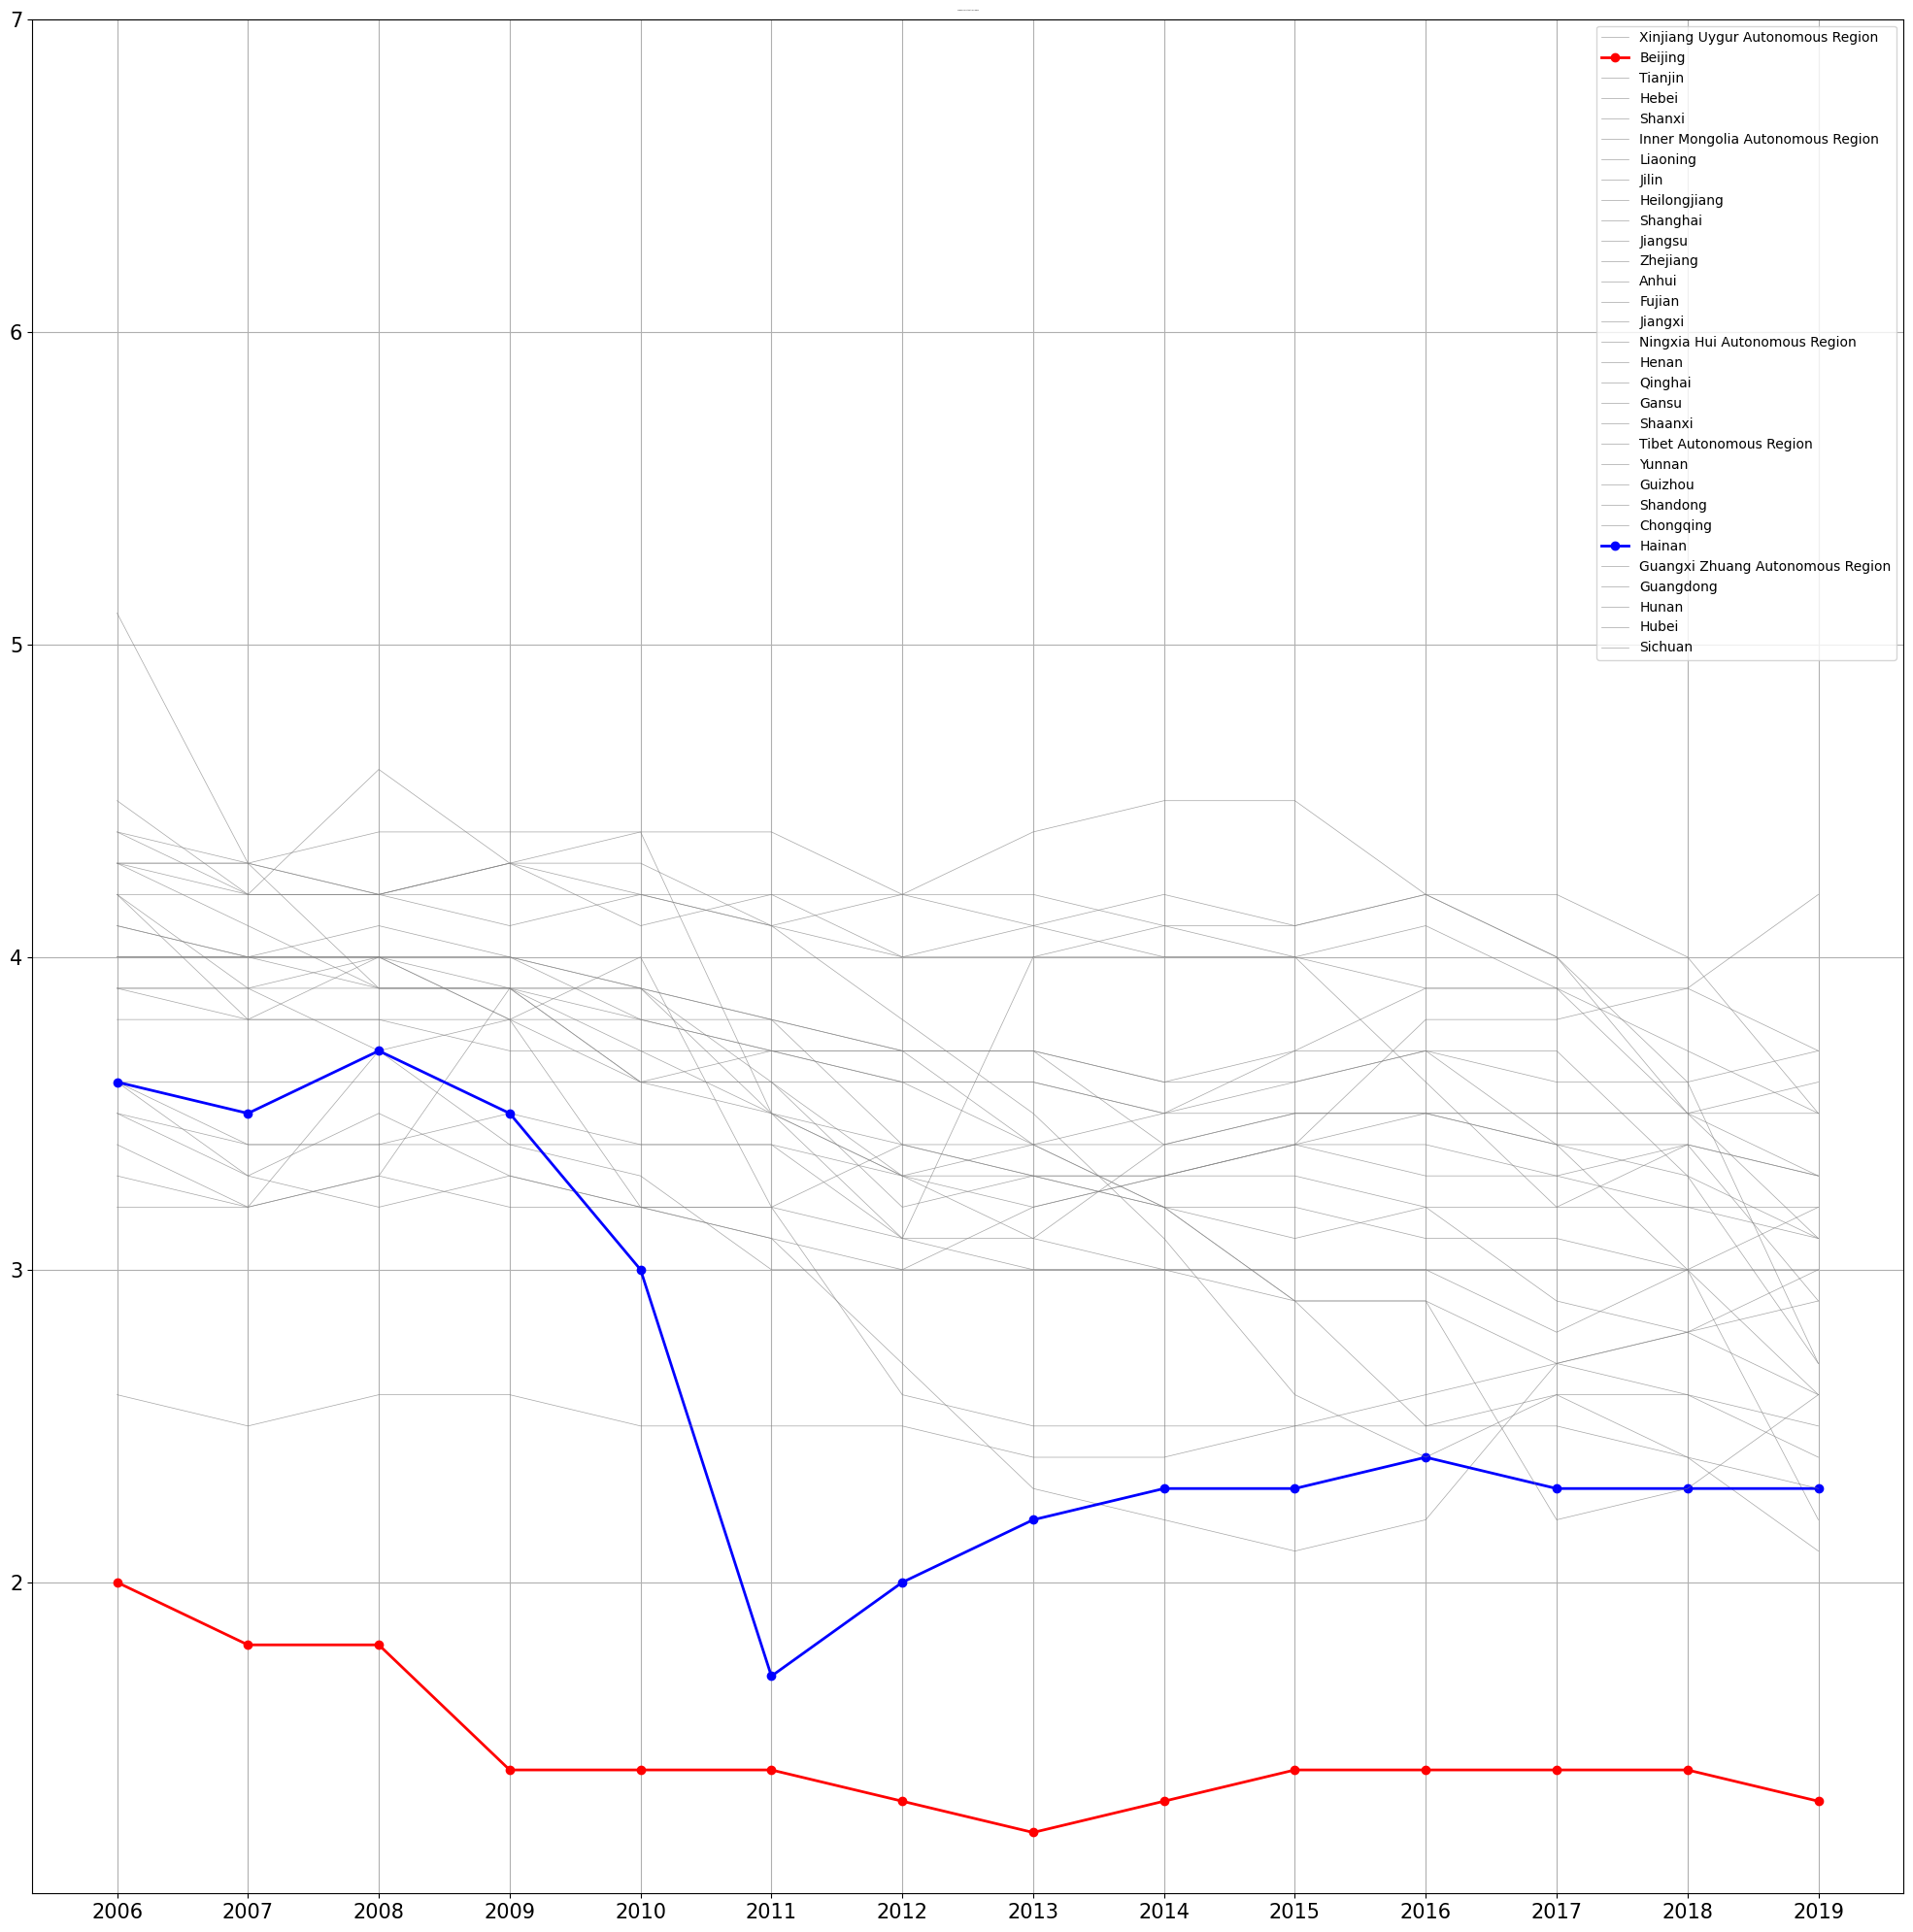

In [40]:
configs = {
    "FONT_SIZE": 1, 
    "FIGSIZE": (20, 20)
}
plot_title = "Unemployment Rate by region"
exceptions = {
    "Beijing": "red",
    "Hainan": "blue",
}
fig = eda.line_plots(unemprate, "unemp_rate", plot_title, exceptions, configs, show=False)
ax = fig.axes[0]
ax.set_ylim(top=7)
ax.legend(loc="upper right")

The line chart shows that there is a slightly downward trend in the unemployment rate in most of the provinces over the 14 years. **Beijing** has the lowest unemployment rate. It is remarkable that there was a sudden drop in the unemployment rate in **Hainan** in 2011, which decreased by 43.33%.

#### Correlation matrix of provincial unemployment rate

In [41]:
unemprate_transpose = unemprate.T
unemprate_transpose.columns = unemprate_transpose.iloc[0]
unemprate_transpose = unemprate_transpose[1:].astype(float)
unemprate_corr = unemprate_transpose.corr(numeric_only=True) # correlation matrix
unemprate_corr.head()

Region                             Beijing   Tianjin     Hebei    Shanxi  \
Region                                                                     
Beijing                           1.000000  0.380217  0.423998 -0.066952   
Tianjin                           0.380217  1.000000  0.700913  0.164083   
Hebei                             0.423998  0.700913  1.000000  0.613374   
Shanxi                           -0.066952  0.164083  0.613374  1.000000   
Inner Mongolia Autonomous Region  0.797312  0.732756  0.649680  0.152676   

Region                            Inner Mongolia Autonomous Region  Liaoning  \
Region                                                                         
Beijing                                                   0.797312  0.788373   
Tianjin                                                   0.732756  0.213100   
Hebei                                                     0.649680 -0.006128   
Shanxi                                                    0.152676 -0.323242   
Inner Mongolia Autonomous Region                          1.000000  0.592216   

Region                               Jilin  Heilongjiang  Shanghai   Jiangsu  \
Region                                                                         
Beijing                           0.703549      0.186376  0.485710  0.807485   
Tianjin                           0.815285      0.255045  0.193126  0.760469   
Hebei                             0.812009      0.647217  0.524797  0.652611   
Shanxi                            0.374567      0.552398  0.315075  0.166373   
Inner Mongolia Autonomous Region  0.854470      0.182732  0.582229  0.928731   

Region                            ...  Chongqing   Sichuan   Guizhou  \
Region                            ...                                  
Beijing                           ...   0.615718  0.554194  0.846881   
Tianjin                           ...   0.568134  0.552640  0.735072   
Hebei                             ...   0.906257  0.908789  0.699396   
Shanxi                            ...   0.594598  0.490489  0.202710   
Inner Mongolia Autonomous Region  ...   0.750096  0.650375  0.953539   

Region                              Yunnan  Tibet Autonomous Region   Shaanxi  \
Region                                                                          
Beijing                           0.429671                 0.745791  0.756452   
Tianjin                           0.786933                 0.663314  0.688196   
Hebei                             0.737463                 0.567283  0.712696   
Shanxi                            0.393868                 0.178001  0.319587   
Inner Mongolia Autonomous Region  0.730121                 0.925804  0.938785   

Region                               Gansu   Qinghai  \
Region                                                 
Beijing                           0.659023  0.557979   
Tianjin                           0.622676  0.795022   
Hebei                             0.318105  0.905030   
Shanxi                           -0.014492  0.563303   
Inner Mongolia Autonomous Region  0.785258  0.732610   

Region                            Ningxia Hui Autonomous Region  \
Region                                                            
Beijing                                                0.460563   
Tianjin                                                0.892653   
Hebei                                                  0.853675   
Shanxi                                                 0.491188   
Inner Mongolia Autonomous Region                       0.775226   

Region                            Xinjiang Uygur Autonomous Region  
Region                                                              
Beijing                                                   0.564285  
Tianjin                                                   0.831686  
Hebei                                                     0.780677  
Shanxi                                                    0.2933

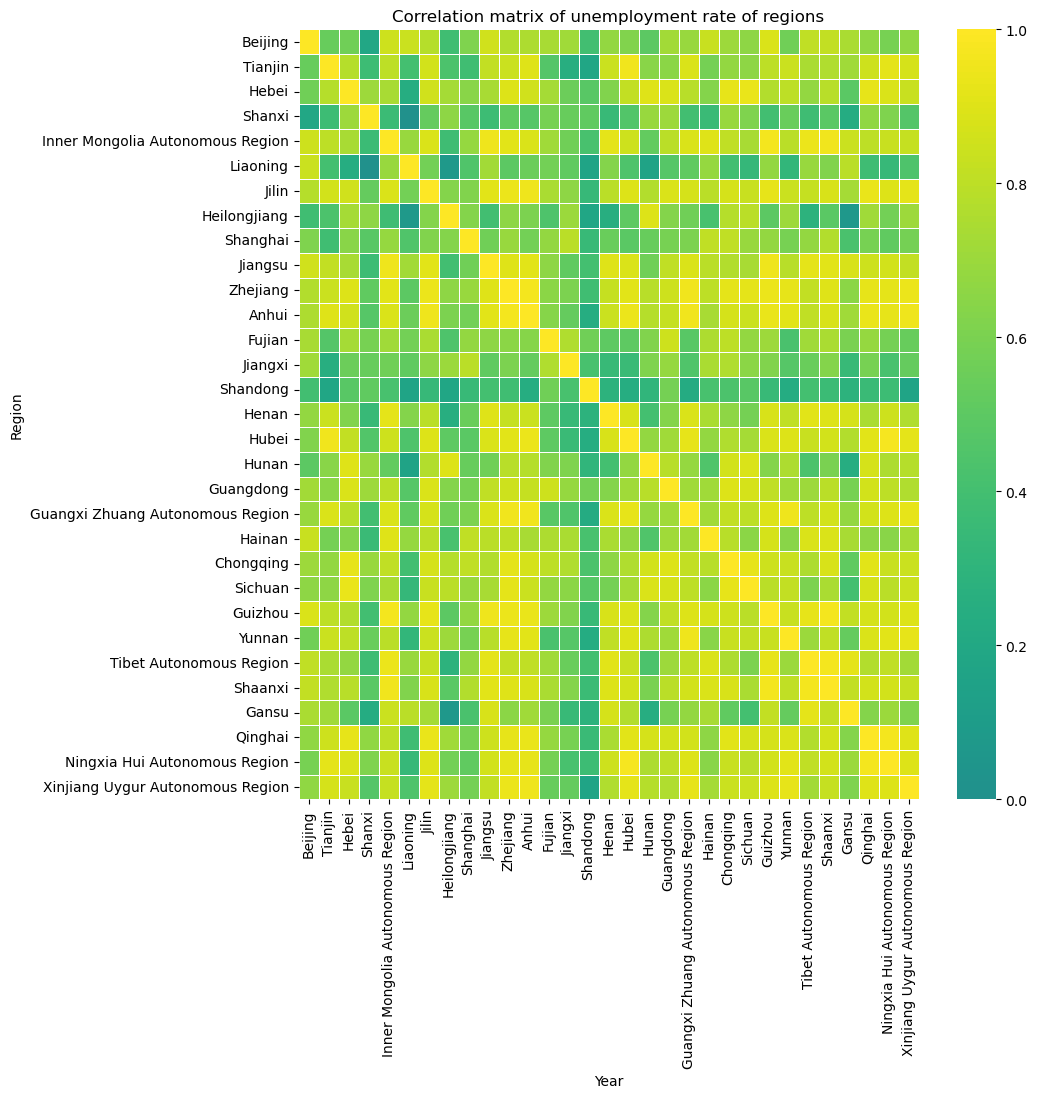

In [42]:
plt.figure(figsize=(10, 10))
unemprate_corr_colors = (unemprate_corr - unemprate_corr.min().min() )
unemprate_corr_colors = unemprate_corr_colors * (1/unemprate_corr_colors.max().max())
ax = sns.heatmap(unemprate_corr_colors, cmap='viridis',
            fmt="d", linewidths=0.5, center=0)
plt.title('Correlation matrix of unemployment rate of regions')
plt.xlabel('Year')
plt.ylabel('Region')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

The correlation matrix above doesn't suggest any strong correlation between different provinces in terms of the unemployment rate, indicating the heterogeneity among the provinces.

### 2.1.6 Deriving the Inflation Rate using CPI data

In [43]:
cpi = pd.read_csv("cleaned-data/9_cpi.csv")
cpi.head()

Region   2019   2018   2017   2016   2015   2014  \
0                           Beijing  102.3  102.5  101.9  101.4  101.8  101.6   
1                           Tianjin  102.7  102.0  102.1  102.1  101.7  101.9   
2                             Hebei  103.0  102.4  101.7  101.5  100.9  101.7   
3                            Shanxi  102.7  101.8  101.1  101.1  100.6  101.7   
4  Inner Mongolia Autonomous Region  102.4  101.8  101.7  101.2  101.1  101.6   

    2013   2012   2011   2010  2009   2008   2007   2006   2005  
0  103.3  103.3  105.6  102.4  98.5  105.1  102.4  100.9  101.5  
1  103.1  102.7  104.9  103.5  99.0  105.4  104.2  101.5  101.5  
2  103.0  102.6  105.7  103.1  99.3  106.2  104.7  101.7  101.8  
3  103.1  102.5  105.2  103.0  99.6  107.2  104.6  102.0  102.3  
4  103.2  103.1  105.6  103.2  99.7  105.7  104.6  101.5  102.4

Now we convert the CPI value into inflation rate using the formula below:

$$
\text{Inflation rate} = \frac{\text{CPI}_t - \text{CPI}_{t-1}}{\text{ CPI}_{t-1}} * 100
$$

In [44]:
inflation_rate = (cpi.set_index("Region").T.sort_index() \
                    .pct_change()*100) \
                    .iloc[1:,:] # select from 2006 onwards (2005 are all NaN)
inflation_rate.head()

Region   Beijing   Tianjin     Hebei    Shanxi  \
2006   -0.591133  0.000000 -0.098232 -0.293255   
2007    1.486620  2.660099  2.949853  2.549020   
2008    2.636719  1.151631  1.432665  2.485660   
2009   -6.279734 -6.072106 -6.497175 -7.089552   
2010    3.959391  4.545455  3.826788  3.413655   

Region  Inner Mongolia Autonomous Region  Liaoning     Jilin  Heilongjiang  \
2006                           -0.878906 -0.197239 -0.098522      0.691700   
2007                            3.054187  3.853755  3.846154      3.238469   
2008                            1.051625 -0.475737 -0.189934      0.380228   
2009                           -5.676443 -4.397706 -4.757374     -5.113636   
2010                            3.510532  3.000000  3.596404      3.692615   

Region  Shanghai   Jiangsu  ...  Chongqing   Sichuan   Guizhou    Yunnan  \
2006    0.198020 -0.489716  ...   1.587302  0.589971  0.693069  0.493097   
2007    1.976285  2.657480  ...   2.246094  3.519062  4.621436  3.925417   
2008    2.519380  1.054650  ...   0.859599 -0.755430  1.127820 -0.188857   
2009   -5.860113 -5.502846  ...  -6.818182 -4.091342 -8.271375 -5.014191   
2010    3.514056  4.216867  ...   4.878049  2.380952  4.255319  3.286853   

Region  Tibet Autonomous Region   Shaanxi     Gansu   Qinghai  \
2006                   0.492611  0.296443 -0.393314  0.793651   
2007                   1.372549  3.645320  3.849951  5.019685   
2008                   2.224371  1.140684  2.851711  3.186504   
2009                  -4.068117 -5.545113 -6.377079 -6.811989   
2010                   0.788955  3.482587  2.764067  2.729045   

Region  Ningxia Hui Autonomous Region  Xinjiang Uygur Autonomous Region  
2006                         0.394089                          0.595829  
2007                         3.532875                          4.146101  
2008                         2.843602                          2.464455  
2009                        -7.188940                         -6.845513  
2010                         3.376365                          3.574975  

[5 rows x 31 columns]

### 2.2 Deriving Aggregated (National Average) data

First, the weights of each province for each year are based on population. For example, if in 2013, Zhejiang has a population of $\alpha$, and the total population of all provinces in 2013 is $\beta$ thousands, then its weight is ${\alpha}/{\beta}$. We will compute the weight for all provinces in all years using the same logic.

In [45]:
pop_long = population.melt(id_vars="Region", var_name="Year", value_name="Population")
ngdp_long = NGDP.melt(id_vars="Region", var_name="Year", value_name="NGDP")
infl_rate_long = inflation_rate.reset_index(names="Year") \
        .melt(id_vars = "Year", 
              value_vars = inflation_rate.columns.tolist(), 
              var_name = "Region", 
              value_name = "inflation_rate")

national_ngdp_per_cap = ngdp_long \
        .merge(right=pop_long, on=["Region", "Year"], how="left") \
        .groupby("Year").agg({
            "NGDP": "sum",
            "Population": "sum"
        })
national_ngdp_per_cap["NGDP_per_cap"] = national_ngdp_per_cap["NGDP"] / national_ngdp_per_cap["Population"]

total_pop = pop_long.groupby("Year", as_index=False).agg({"Population": "sum"})
weights_df = pop_long.merge(right=total_pop, on=["Year"], how="left")
weights_df["weights"] = weights_df["Population_x"] / weights_df["Population_y"]

In [46]:
dfs_long = [birthrate_long, wage_long, income_long, \
            unemprate_long, ngdp_long, infl_rate_long]

def all_same(items):
    if isinstance(items[0], pd.DataFrame):
        return all((x.equals(items[0]) for x in items))
    return all(x == items[0] for x in items)


# Test to see if the dataframes has the same shape aka # rows and # cols
# print(all_same(list(map(lambda df: df.shape, dfs_long))))

# Test to see if the column Region and Year are the same for all dataframes
# print(all_same(list(map(lambda df: df[["Region", "Year"]], dfs_long))))

In [47]:
from functools import reduce

# join all dataframe together on column "Region" and "Year"
df_merged = reduce(lambda  left,right: 
    pd.merge(left,right,on=['Region', 'Year'], how='left'), dfs_long)

Here are the weights of each province in each year from 2006 to 2019:

In [48]:
weights_df

Region  Year  Population_x  Population_y  \
0                             Beijing  2019          2190        140805   
1                             Tianjin  2019          1385        140805   
2                               Hebei  2019          7447        140805   
3                              Shanxi  2019          3497        140805   
4    Inner Mongolia Autonomous Region  2019          2415        140805   
..                                ...   ...           ...           ...   
429                           Shaanxi  2006          3699        129523   
430                             Gansu  2006          2547        129523   
431                           Qinghai  2006           548        129523   
432     Ningxia Hui Autonomous Region  2006           604        129523   
433  Xinjiang Uygur Autonomous Region  2006          2050        129523   

      weights  
0    0.015553  
1    0.009836  
2    0.052889  
3    0.024836  
4    0.017151  
..        ...  
429  0.028559  
430  0.019664  
431  0.004231  
432  0.004663  
433  0.015827  

[434 rows x 5 columns]

With that weight dataframe, we can now compute the national average of each metric (`wage`, `birth_rate`, `disposable_income`, `unemp_rate` and `inflation_rate`). This average will be the weighted average of all provinces for each year.

In [49]:
df_aggs = df_merged.merge(right=weights_df, on=["Region", "Year"], how="left")
df_aggs = df_aggs.assign(
    agg_wage = lambda x: x["wage"] * x["weights"],
    agg_birth_rate = lambda x: x["birth_rate"] * x["weights"],
    agg_disposable_income = lambda x: x["disposable_income"] * x["weights"],
    agg_unemp_rate = lambda x: x["unemp_rate"] * x["weights"],
    agg_inflation_rate = lambda x: x["inflation_rate"] * x["weights"]

)

This is the resulting dataframe of national (weighted) average on each metric.


In [50]:
df_aggs = df_aggs \
    .filter(like="agg_") \
    .assign(Year=df_aggs.Year) \
    .groupby("Year", as_index=False) \
    .sum()
df_aggs.head()

Year      agg_wage  agg_birth_rate  agg_disposable_income  agg_unemp_rate  \
0  2006  13700.185264       11.111821            7396.608888        3.819470   
1  2007  16500.054819       11.177068            8621.689385        3.669165   
2  2008  19512.983596       11.179822            9958.024849        3.728662   
3  2009  22148.162908       11.168745           10956.793587        3.677729   
4  2010  25755.778123       11.091313           12495.516707        3.584803   

   agg_inflation_rate  
0           -0.276876  
1            3.389946  
2            1.008213  
3           -6.172374  
4            3.894455

Explanation of the dataframe above using the disposable income of Zhejiang as an example:

We can see that the disposable income of citizens in Zhejiang is above the national average, so they are wealthier than average citizen. Basically, that dataframe contains the national (weighted) averages of the metrics

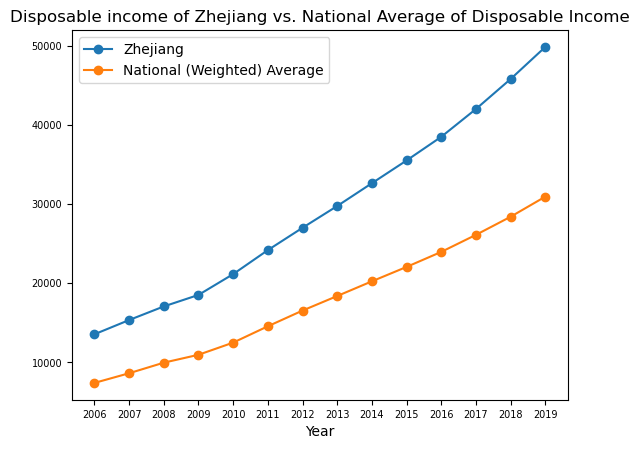

In [51]:
# Plotting disposable income for a province vs national weighted average

reg = "Zhejiang"
test = income_long[income_long["Region"] == reg]

plt.plot(test["Year"], test["disposable_income"], label=reg, marker="o")
plt.plot(test["Year"], df_aggs["agg_disposable_income"], label="National (Weighted) Average", marker="o")
plt.legend()
plt.title(f"Disposable income of {reg} vs. National Average of Disposable Income")
plt.xlabel("Year")
plt.tick_params(axis='both', which='major', labelsize=7)

## 3. Model Fitting

We will merge the dataset of birth rate, NGDP per capita, average wage, disposable income, unemployment rate and inflation rate into one dataframe and add a new column `indicator`, which denotes the implementation of universal Two-child policy in 2016. For the regression model, we will adjust standard errors for clustering to improve precision of the estimates.

* The predictors are: `ngdp_per_capita`,  `wage`, `income`, `unemprate`, `indicator` and `inflation_rate` .
* The dependent variable Y is `birth_rate`.

In [52]:
#Create indicator variable of 0 for Year < 2016 and 1 for Year >= 2016 to denote the implementation of universal Two-child policy in 2016.

df_merged["indicator2016"] = (pd.to_datetime(df_merged["Year"]).dt.year >= 2016).astype(int)

Given the mathematical relationship between the `wage` and `disposable_income`, we suspect some multicollinearity between them. To prevent identification problems in our regression model, we are going to fit a full model with all predictors first and see the results. Then we will select appropriate variables to retrain the regression model.

In [53]:
from statsmodels.api import OLS
import statsmodels.formula.api as smf

# scaling does not really affect the result of statistical inference
# https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia
# we won't scale the covariates here so that it's easier to interpret the slope coefficients.

# change the group to Region

X = df_merged.drop(columns=["Year", "birth_rate"])
y = df_merged["birth_rate"]

linear_model = smf.ols(formula="birth_rate ~ C(Region) + disposable_income + unemp_rate + NGDP + inflation_rate + C(indicator2016)*wage", 
                       data=df_merged)
results = linear_model.fit(cov_type="cluster", cov_kwds={"groups": X["Region"]})

In [54]:
results.summary().tables[0]

/Users/tien/opt/anaconda3/envs/econ323/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 37, but rank is 7
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.table.SimpleTable'>

In [55]:
results.pvalues[(results.pvalues < 0.05) & (~results.pvalues.index.str.contains("C(Region)", regex=False))]

Intercept         1.028770e-14
NGDP              9.138713e-03
inflation_rate    4.416226e-02
dtype: float64

In [56]:
results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

**Comments**: 
* **Anhui** is chosen as the baseline.
* The F-test for overall significance has a p-value < 0.05, suggesting that there are at least 1 significant coefficient in the model.
* It seems like the only predictors (besides the dummy variables of regions) that are statistically significant (**p-value** $< 0.05$) are `NGDP` and `inflation_rate`. This could be potentially due to multicollinearity with other numerical covariates.

In [57]:
results.summary2().tables[1].iloc[[0,-6,-5,-4,-3,-2,-1],:]\
        .assign(isSignificant = lambda x: x["P>|z|"] < 0.05) # just the coefficients for the one we're intered in

Coef.  Std.Err.         z         P>|z|  \
Intercept                   11.586309  1.497781  7.735649  1.028770e-14   
disposable_income           -0.000023  0.000034 -0.655510  5.121392e-01   
unemp_rate                   0.270661  0.372439  0.726726  4.673941e-01   
NGDP                         0.000044  0.000017  2.606821  9.138713e-03   
inflation_rate              -0.018656  0.009270 -2.012547  4.416226e-02   
wage                        -0.000008  0.000010 -0.754693  4.504331e-01   
C(indicator2016)[T.1]:wage  -0.000006  0.000008 -0.825970  4.088213e-01   

                              [0.025     0.975]  isSignificant  
Intercept                   8.650712  14.521906           True  
disposable_income          -0.000090   0.000045          False  
unemp_rate                 -0.459306   1.000629          False  
NGDP                        0.000011   0.000078           True  
inflation_rate             -0.036825  -0.000487           True  
wage                       -0.000028   0.000012          False  
C(indicator2016)[T.1]:wage -0.000021   0.000009          False

### Using variance inflation factor to identify multicollinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

result_dict = {"predictor": X.columns[1:], "VIF" : []}
for idx, col in enumerate(X.columns[1:]):
    vif = variance_inflation_factor(X.iloc[:,1:7], idx)
    result_dict["VIF"].append(vif)
    
pd.DataFrame(result_dict)

predictor        VIF
0               wage  26.005184
1  disposable_income  22.025988
2         unemp_rate   3.597108
3               NGDP   3.273778
4     inflation_rate   1.017998
5      indicator2016   2.930799

It's worth acknowledging that what constitutes a "high" VIF is still a subject of debate. According to this [site](https://online.stat.psu.edu/stat462/node/180/), $\text{VIF} \leq 4$ and below is considered moderately "safe". From the quick VIF analysis above, it suggests that `wage` and `disposable_income` exhibit multicollinearity issues.

The `wage` column in our dataframe only shows the average wage of employees working in the state-owned business, while `disposable_income` represents the amount of personal income after tax. Therefore, `disposable_income` is a more relevant attribute compared to `wage`. In the next step we will get rid of `wage` and keep the rest of the variables to refit the model.

In [59]:
refit_lm = smf.ols(formula="birth_rate ~ C(Region) + unemp_rate + disposable_income + NGDP + inflation_rate + indicator2016", 
                   data=df_merged)
refit_lm_results = refit_lm.fit(cov_type="cluster", cov_kwds={"groups": X["Region"]})
refit_lm_results.summary().tables[0]

/Users/tien/opt/anaconda3/envs/econ323/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 35, but rank is 5
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.table.SimpleTable'>

Here we're just showing the coefficients of interest and ignore the dummy variables for `Region` for readability. The
column `isSignificant` indicate whethere a variable is statistically significant at $\alpha = 0.05$.

In [60]:
refit_lm_results.summary2().tables[1].iloc[[0,-5,-4,-3,-2,-1],:]\
        .assign(isSignificant = lambda x: x["P>|z|"] < 0.05) # ignore the dummy region variables

Coef.  Std.Err.         z         P>|z|    [0.025  \
Intercept          11.571674  1.271117  9.103544  8.743089e-20  9.080330   
unemp_rate          0.288699  0.323049  0.893669  3.714989e-01 -0.344466   
disposable_income  -0.000049  0.000024 -2.095450  3.613098e-02 -0.000095   
NGDP                0.000047  0.000018  2.712801  6.671707e-03  0.000013   
inflation_rate     -0.018930  0.009562 -1.979650  4.774283e-02 -0.037672   
indicator2016       0.171696  0.209848  0.818191  4.132481e-01 -0.239599   

                      0.975]  isSignificant  
Intercept          14.063019           True  
unemp_rate          0.921865          False  
disposable_income  -0.000003           True  
NGDP                0.000082           True  
inflation_rate     -0.000188           True  
indicator2016       0.582992          False

It shows that after refitting the model, `NGDP`, `disposable_income` and `inflation_rate` are statistically significant (**p-value** <0.05).

#### Interpretation of coefficients:

* `disposable_income` = $-0.000049$: As `disposable_income` increase by 1 unit, the expected `birth_rate` decreased by $0.000049$, holding other variable constants.
* `unemp_rate` = $0.288699$: As `unemp_rate` increase by 1 unit, the expected `birth_rate` increase by $0.288699$ unit, holding other variable constants.
* `NGDP` = $0.000047$: As `NGDP` increases by 1 unit, the expected `birth_rate` increases by $0.000047$ unit, holding other variable constants.
* `inflation_rate` = $-0.018930$: As `NGDP` increases by 1 unit, the expected `birth_rate` decreases by $0.018930$ unit, holding other variable constants. 
* `indicator2016` = $0.171696$: As for year from 2016 and later, the expected `birth_rate` increases by $0.171696$ unit above baseline, holding other variable constants. 

In [61]:
# source codes of script is from
# https://www.statsmodels.org/devel/examples/notebooks/generated/linear_regression_diagnostics_plots.html
from scripts.regression_plots import LinearRegDiagnostic

reg_results = LinearRegDiagnostic(refit_lm_results)

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

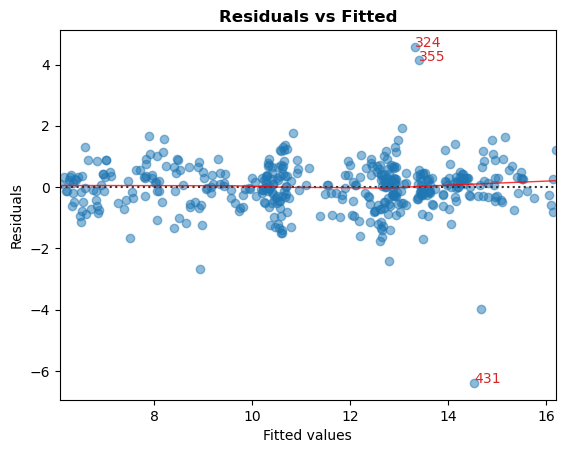

In [62]:
reg_results.residual_plot()

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

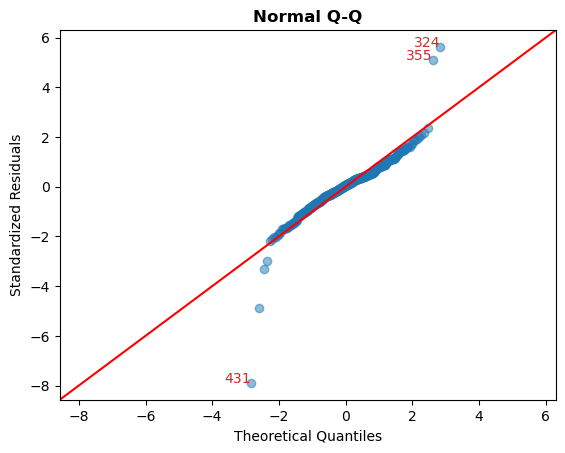

In [63]:
reg_results.qq_plot()

A necessary step when fitting a linear model is to check for 2 important assumptions:

* From the Residuals vs Fitted Plot, we can see that the residuals are randomly scattered (patternless), which suggests that the **homoscedasticity (constant variance)** assumption is reasonable.

* From the residual QQ plot, we see that most of standardized residuals lie on the identity line beside some outliers, suggesting that our assumption of **Normally distributed error** is reasonable here.

## 4. Conclusion
The results show that at a 5% significance level, Nominal GDP has a **positive** effect on the birth rate, while disposable income and inflation rate have a **negative** effect on the birth rate. Besides, we did not find any significant effect of the universal Two-child Policy on the birth rate.

The findings provide important insights into how economic development has impacted the birth rate in China in the last two decades and the necessity of a better family planning policy to boost birth rate. We have seen that after five years of the enactment of the Two-child Policy, the Chinese government released the Three-Child Policy in June 2021.

## References
BBC. (2018, January 18). China’s economy grows by 6.9% in 2017. BBC News. https://www.bbc.com/news/business-42727781

International Monetary Fund. (2022, September). The New Economics of Fertility. IMF. https://www.imf.org/en/Publications/fandd/issues/Series/Analytical-Series/new-economics-of-fertility-doepke-hannusch-kindermann-tertilt#:~:text=It%20suggests%20that%20as%20parents

National Bureau of Statistics. (n.d.). Www.stats.gov.cn. https://www.stats.gov.cn

Zeng, Y., & Hesketh, T. (2016). The effects of China’s universal two-child policy. The Lancet, 388(10054), 1930–1938. https://doi.org/10.1016/s0140-6736(16)31405-2